In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk

# Load data

In [2]:
data_set = pd.read_csv('listings.csv')

In [3]:
data_set.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6983,https://www.airbnb.com/rooms/6983,20220924142144,2022-09-24,previous scrape,Copenhagen 'N Livin',Lovely apartment located in the hip Nørrebro a...,"Nice bars and cozy cafes just minutes away, ye...",https://a0.muscache.com/pictures/42044170/f63c...,16774,...,4.89,4.73,4.71,NaN,f,1,1,0,0,1.08
1,26057,https://www.airbnb.com/rooms/26057,20220924142144,2022-09-25,city scrape,Lovely house - most attractive area,Our lovely house in the center of the city is ...,The neighborhood is the most famous one and th...,https://a0.muscache.com/pictures/miso/Hosting-...,109777,...,4.86,4.94,4.81,NaN,f,1,1,0,0,0.55
2,26473,https://www.airbnb.com/rooms/26473,20220924142144,2022-09-25,city scrape,City Centre Townhouse Sleeps 1-10 persons,GUESTHOUSE ON KNABROSTRÆDE - located in the ab...,NaN,https://a0.muscache.com/pictures/8e132ba0-b68c...,112210,...,4.70,4.89,4.59,NaN,f,3,3,0,0,2.06
3,29118,https://www.airbnb.com/rooms/29118,20220924142144,2022-09-25,city scrape,Best Location in Cool Istedgade,<b>The space</b><br />The apartment is situate...,NaN,https://a0.muscache.com/pictures/b83c7003-367a...,125230,...,5.00,4.87,4.80,NaN,f,1,1,0,0,0.16
4,31094,https://www.airbnb.com/rooms/31094,20220924142144,2022-09-24,previous scrape,"Beautiful, spacious, central, renovated Penthouse","Welcome to our home, we hope you will enjoy Wo...","What else is nearby?<br />To be honest, We thi...",https://a0.muscache.com/pictures/miso/Hosting-...,129976,...,4.82,4.80,4.53,NaN,f,1,1,0,0,0.13


# 1 - Filtering columns

In [4]:
columns_to_keep = [
        'id',
    'name',
    'host_id',
    'host_name',
    'neighbourhood_cleansed',
    'latitude',
    'longitude',
    'room_type',
    'price',
    'minimum_nights',
    'number_of_reviews',
    'last_review',
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365'
]

data = pd.DataFrame()
for column in columns_to_keep:
    data[column] = data_set[column]

data.head()

,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365
0,6983,Copenhagen 'N Livin',16774,Simon,Nrrebro,55.686410,12.547410,Entire home/apt,$898.00,3,...,4.78,4.79,4.78,4.86,4.89,4.73,4.71,1.08,1,0
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,"$2,600.00",4,...,4.91,4.93,4.96,4.93,4.86,4.94,4.81,0.55,1,303
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,"$3,250.00",3,...,4.53,4.63,4.44,4.78,4.70,4.89,4.59,2.06,3,56
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,$725.00,7,...,4.92,4.87,4.73,5.00,5.00,4.87,4.80,0.16,1,59
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,"$1,954.00",3,...,4.88,4.82,4.88,4.87,4.82,4.80,4.53,0.13,1,0


# 2 - Handling missing values

In [5]:
data = data[data["number_of_reviews"] > 0]
data['number_of_reviews'].value_counts(ascending=True)

number_of_reviews
249       1
164       1
127       1
432       1
289       1
       ... 
5       640
4       749
3       920
2      1008
1      1067
Name: count, Length: 265, dtype: int64

# 3 - Fixing neighbourhood_cleansed and price

In [6]:
data['neighbourhood_cleansed'].value_counts()

neighbourhood_cleansed
Nrrebro                      2061
Vesterbro-Kongens Enghave    2037
Indre By                     1851
sterbro                      1311
Frederiksberg                1183
Amager Vest                  1066
Amager st                     928
Bispebjerg                    607
Valby                         539
Vanlse                        298
Brnshj-Husum                  289
Name: count, dtype: int64

In [7]:
data.loc[data['neighbourhood_cleansed'] == 'Nrrebro', 'neighbourhood_cleansed'] = 'Nørrebro'
data.loc[data['neighbourhood_cleansed'] == 'vsterbro', 'neighbourhood_cleansed'] = 'Østerbro'
data.loc[data['neighbourhood_cleansed'] == 'Vanlse', 'neighbourhood_cleansed'] = 'Vanløse'
data.loc[data['neighbourhood_cleansed'] == 'Amager st', 'neighbourhood_cleansed'] = 'Amager Øst'
data.loc[data['neighbourhood_cleansed'] == 'Brnshj-Husum', 'neighbourhood_cleansed'] = 'Brønshøj-Husum'
data['neighbourhood_cleansed'].value_counts()

neighbourhood_cleansed
Nørrebro                     2061
Vesterbro-Kongens Enghave    2037
Indre By                     1851
sterbro                      1311
Frederiksberg                1183
Amager Vest                  1066
Amager Øst                    928
Bispebjerg                    607
Valby                         539
Vanløse                       298
Brønshøj-Husum                289
Name: count, dtype: int64

In [8]:
data['price'] = data['price'].str.replace(',', '').str.replace('$', '').astype(float)
data['price']

0         898.0
1        2600.0
2        3250.0
3         725.0
4        1954.0
          ...  
13808     856.0
13809    1050.0
13811     450.0
13812     400.0
13814     420.0
Name: price, Length: 12170, dtype: float64

# 4 - Words cloud of names 

In [9]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text = " ".join(name for name in data['name'])
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(['Copenhagen', 'copenhagen', 'København', 'københavn', 'cph', 'CPH', 'kbh', 'KBH'])
wordcloud = WordCloud(stopwords=custom_stopwords, background_color="white", width=800, height=400).generate(text)


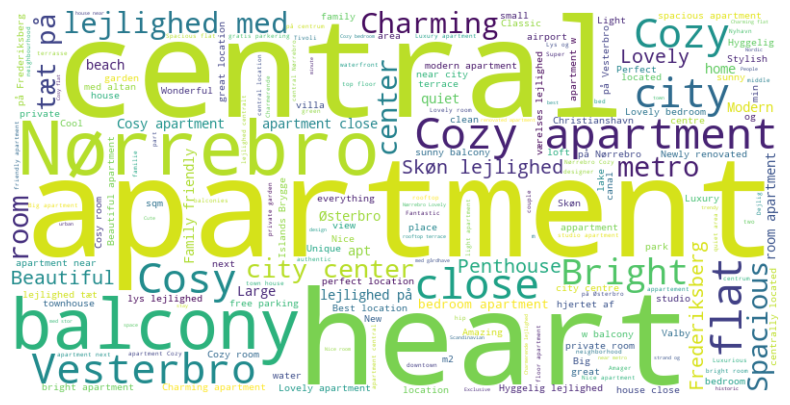

In [10]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# 5 - Word cloud of host names

In [11]:
host_names_text = " ".join(str(name) for name in data['host_name'])
wordcloud_host_names = WordCloud(background_color="white", width=800, height=400).generate(host_names_text)

The distribution of host names seem to correspond with the distribution of names according to Danmarks Statistik, where `Mette` and `Anne` are the most popular names and most of the other names are top 20 in their category

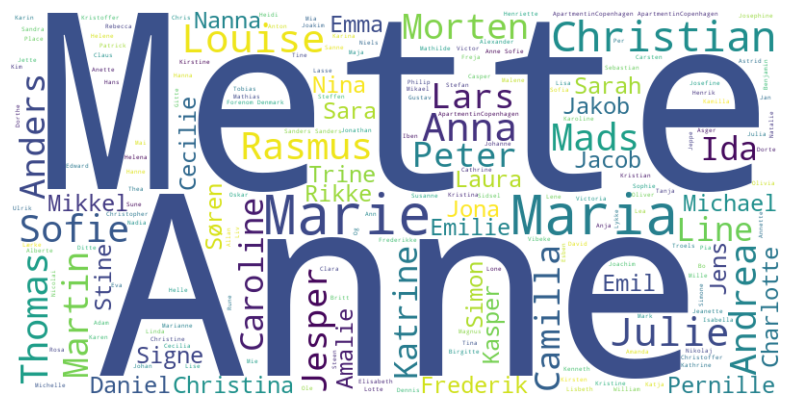

In [12]:
plt.figure(figsize=(10, 5)) 
plt.imshow(wordcloud_host_names, interpolation='bilinear')
plt.axis('off')
plt.show()

# 6 - Creating column of price bins

In [13]:
price_bins = np.linspace(0,10000, num=11)
price_bins

array([    0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,  7000.,
        8000.,  9000., 10000.])

In [14]:
data['price_category'] = data['price'].apply(lambda price: np.digitize(price, price_bins))
data[['price', 'price_category']].head()

,price,price_category
0,898.0,1
1,2600.0,3
2,3250.0,4
3,725.0,1
4,1954.0,2


# 7 Plotting listings data on map

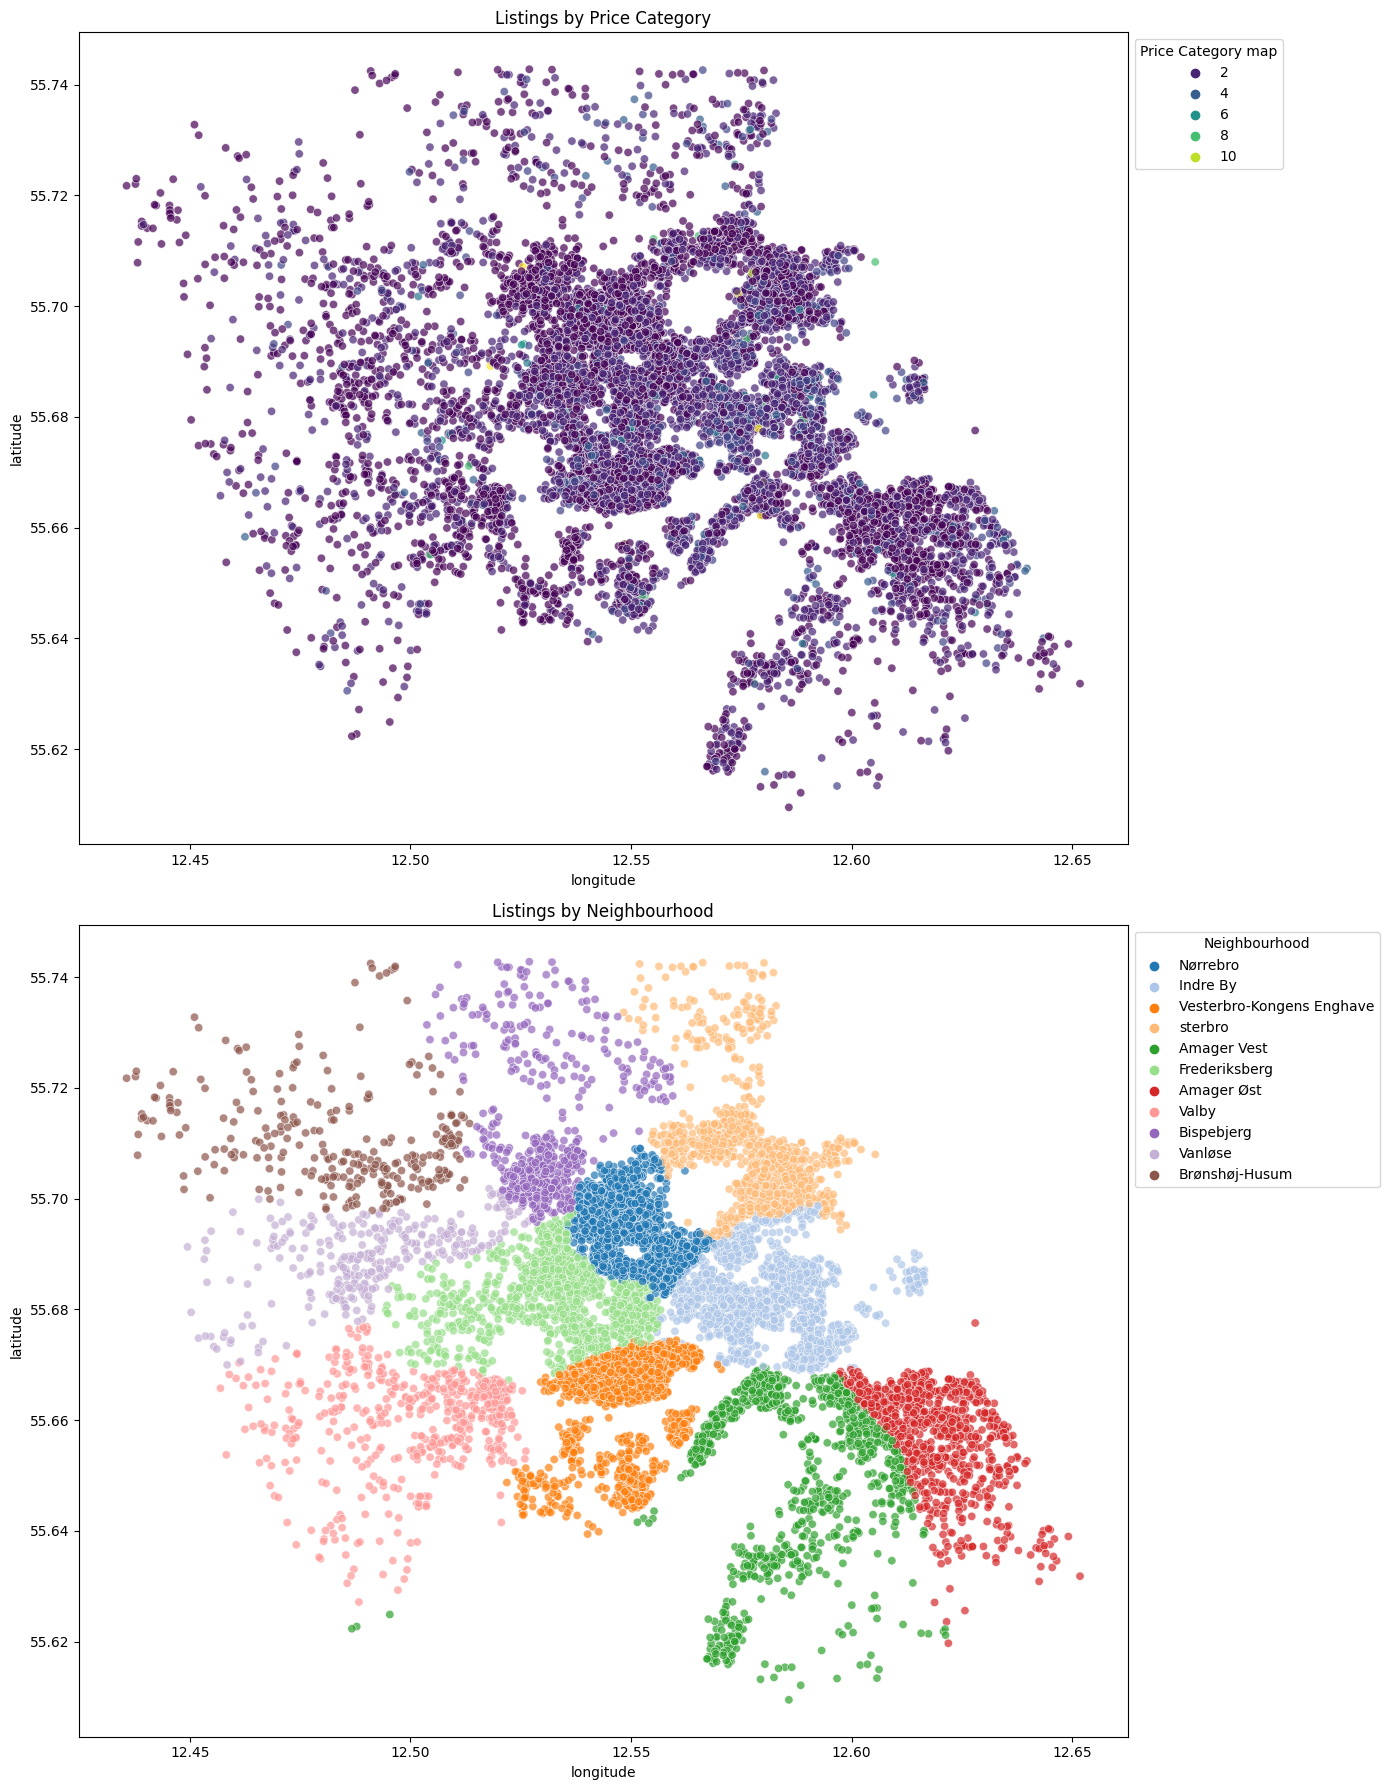

In [15]:
import seaborn as sns
fig, ax = plt.subplots(2, 1, figsize=(14, 18))
sns.scatterplot(data=data, x='longitude', y='latitude', hue='price_category', palette='viridis', ax=ax[0], alpha=0.7)
ax[0].set_title("Listings by Price Category")
ax[0].legend(loc="upper left", title="Price Category map", bbox_to_anchor=(1, 1))

sns.scatterplot(data=data, x='longitude', y='latitude', hue='neighbourhood_cleansed', palette='tab20', ax=ax[1], alpha=0.7)
ax[1].set_title("Listings by Neighbourhood")
ax[1].legend(loc="upper left", title="Neighbourhood", bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

# 8 - Boxplots 

## Prices by neighbourhood

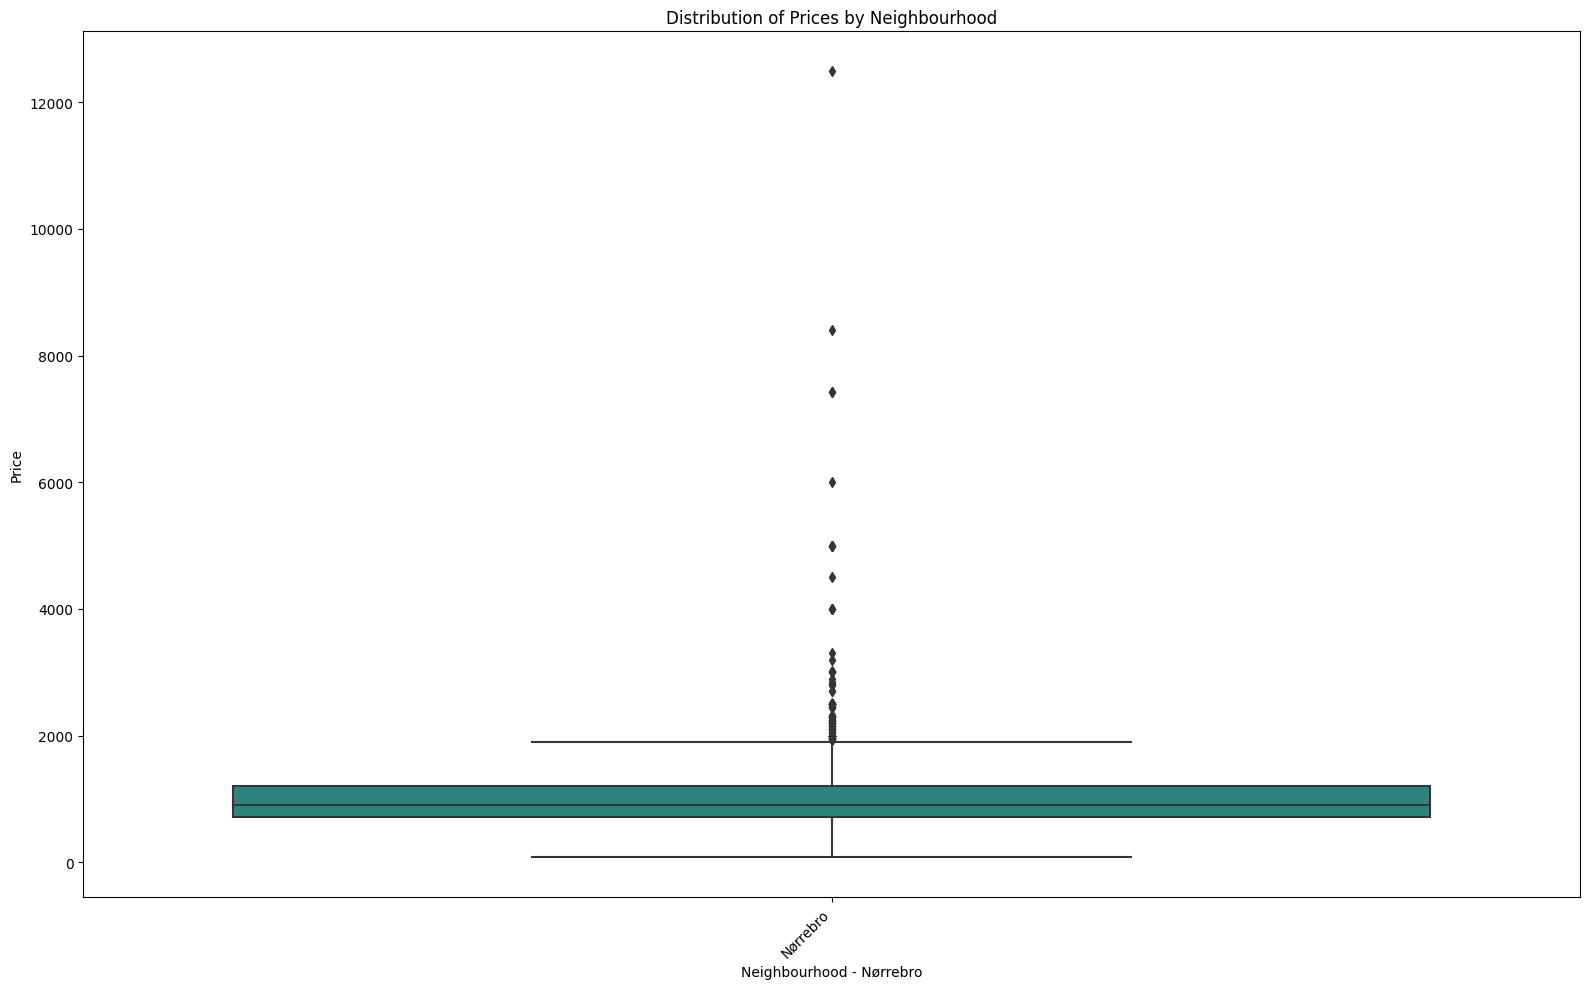

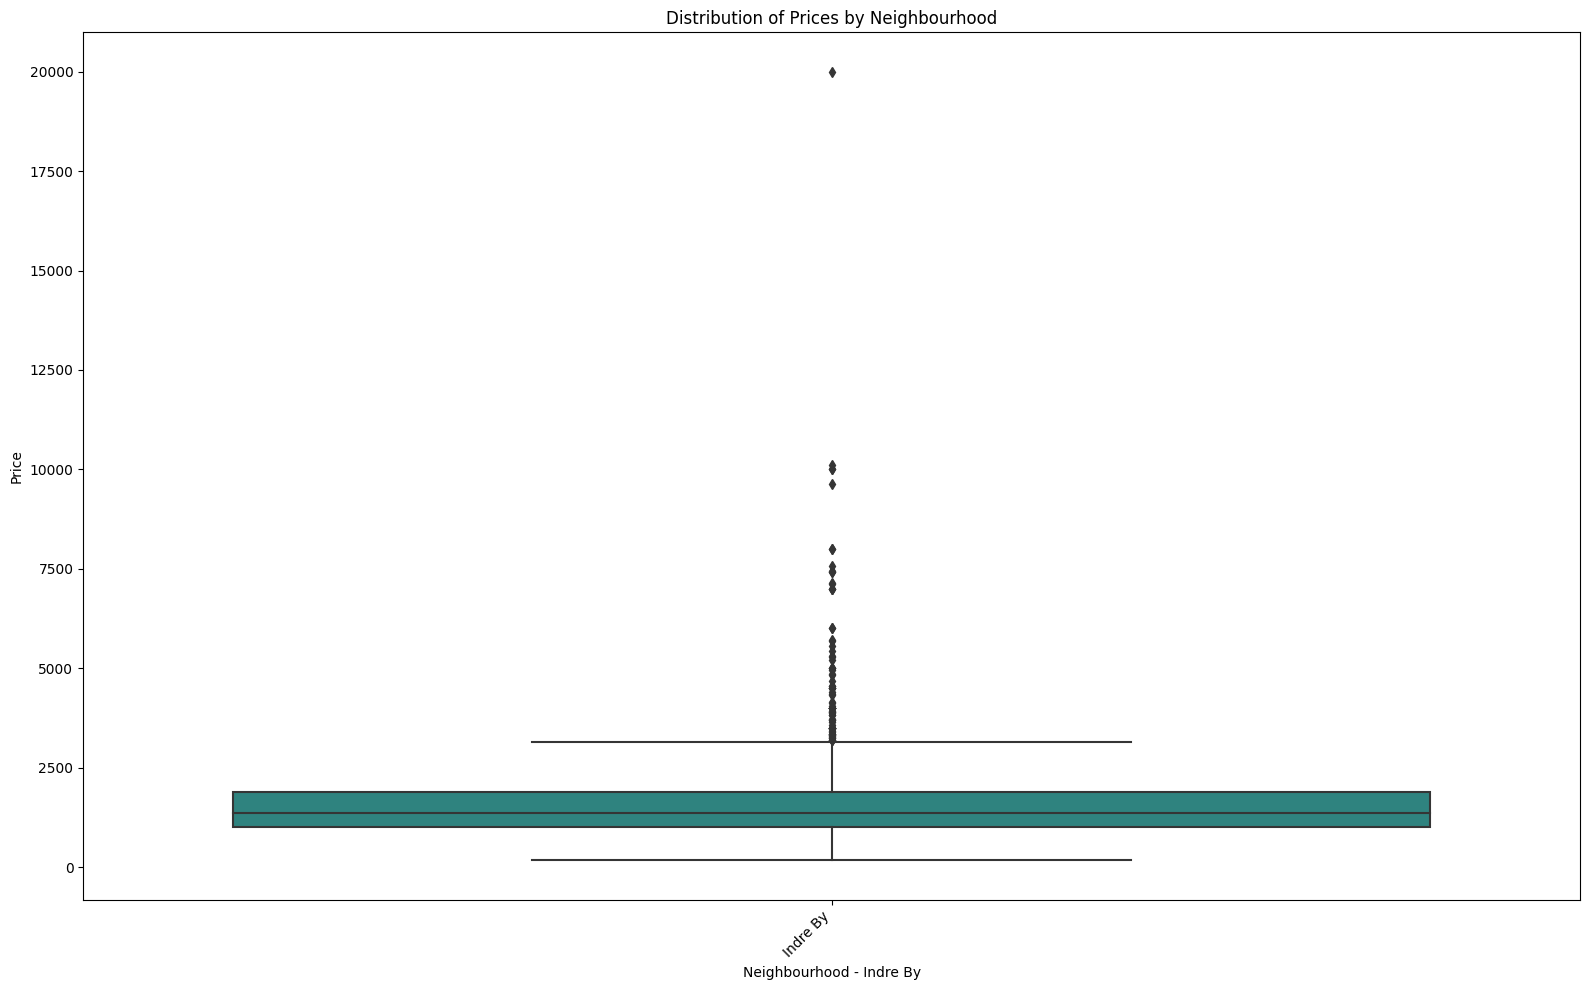

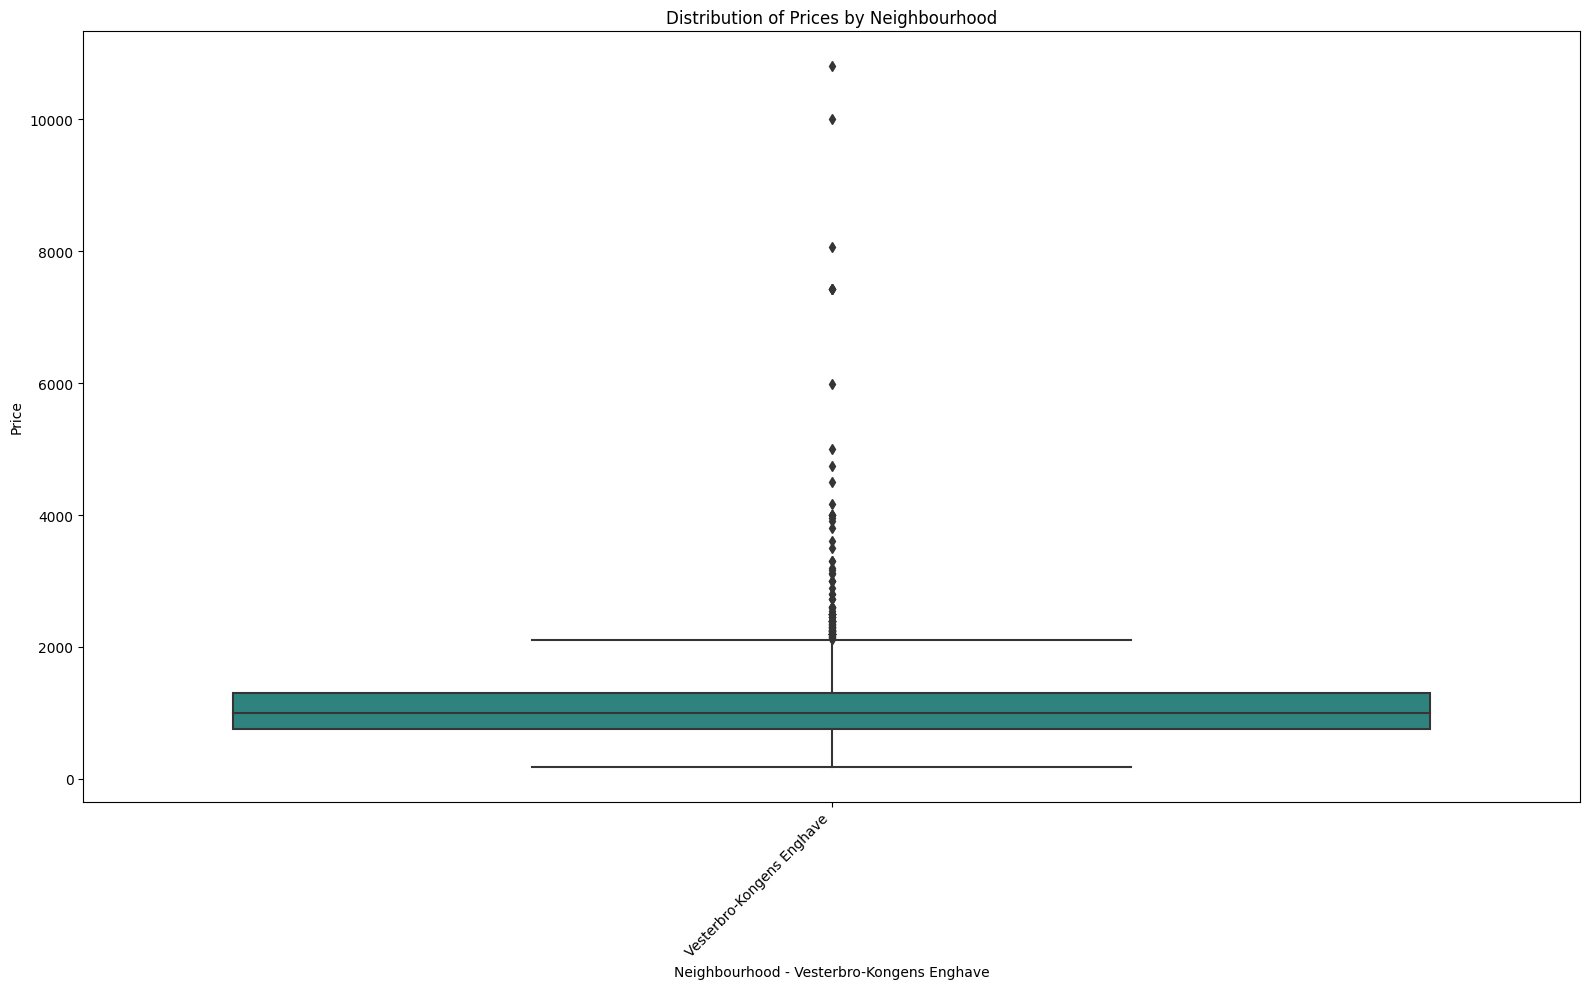

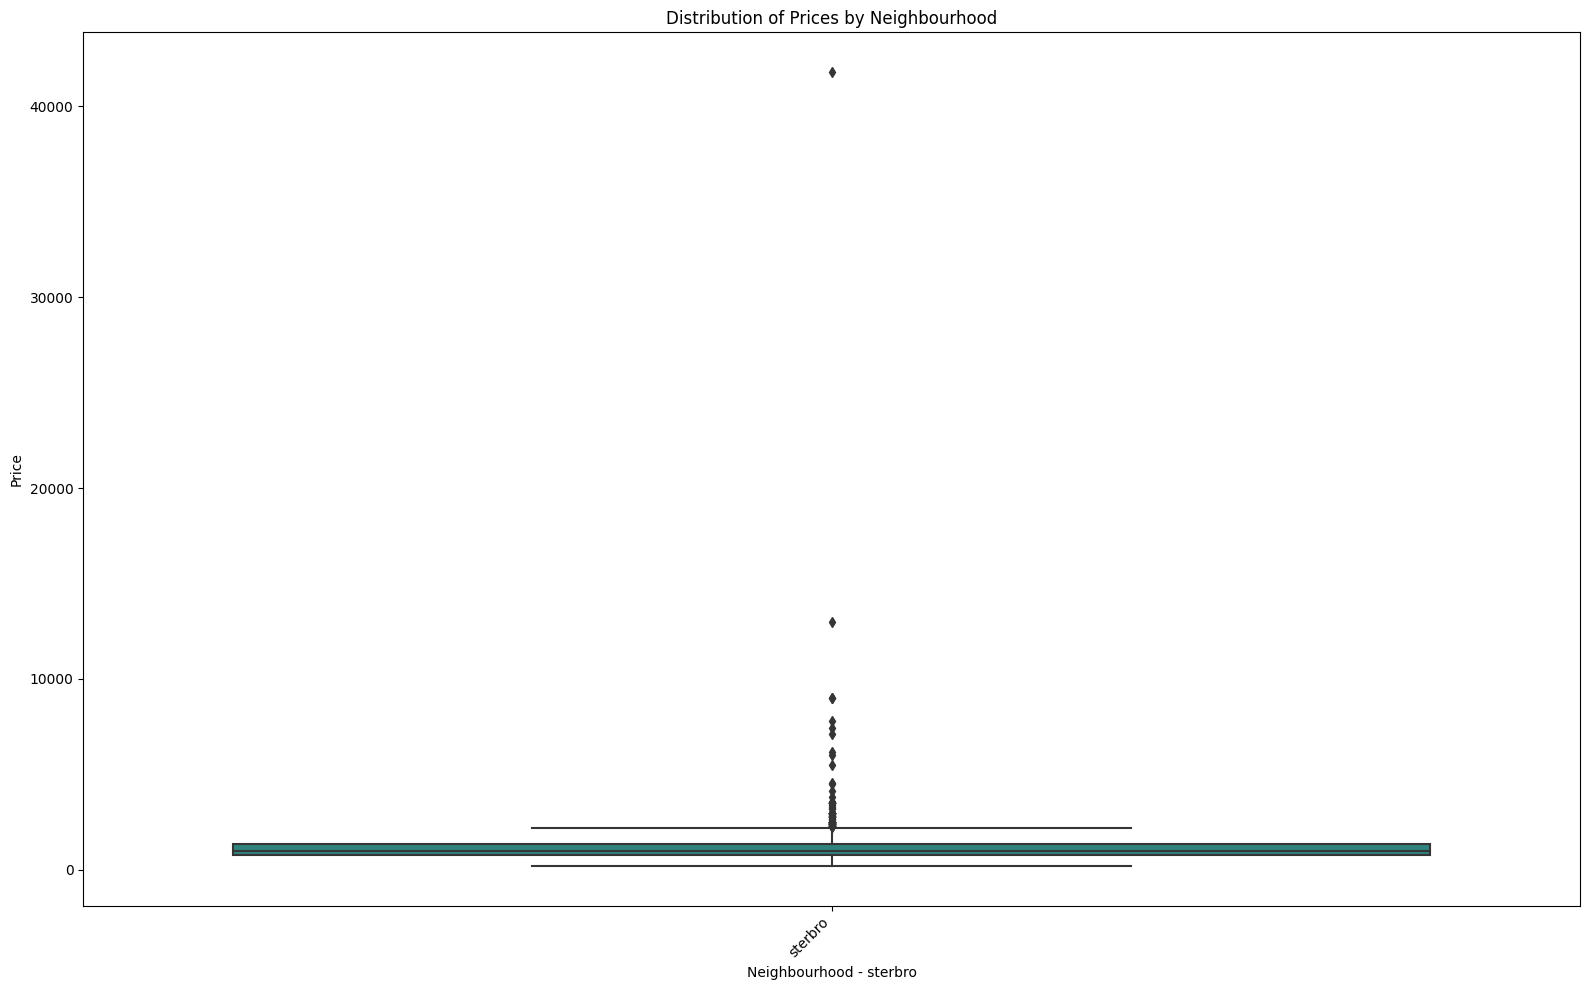

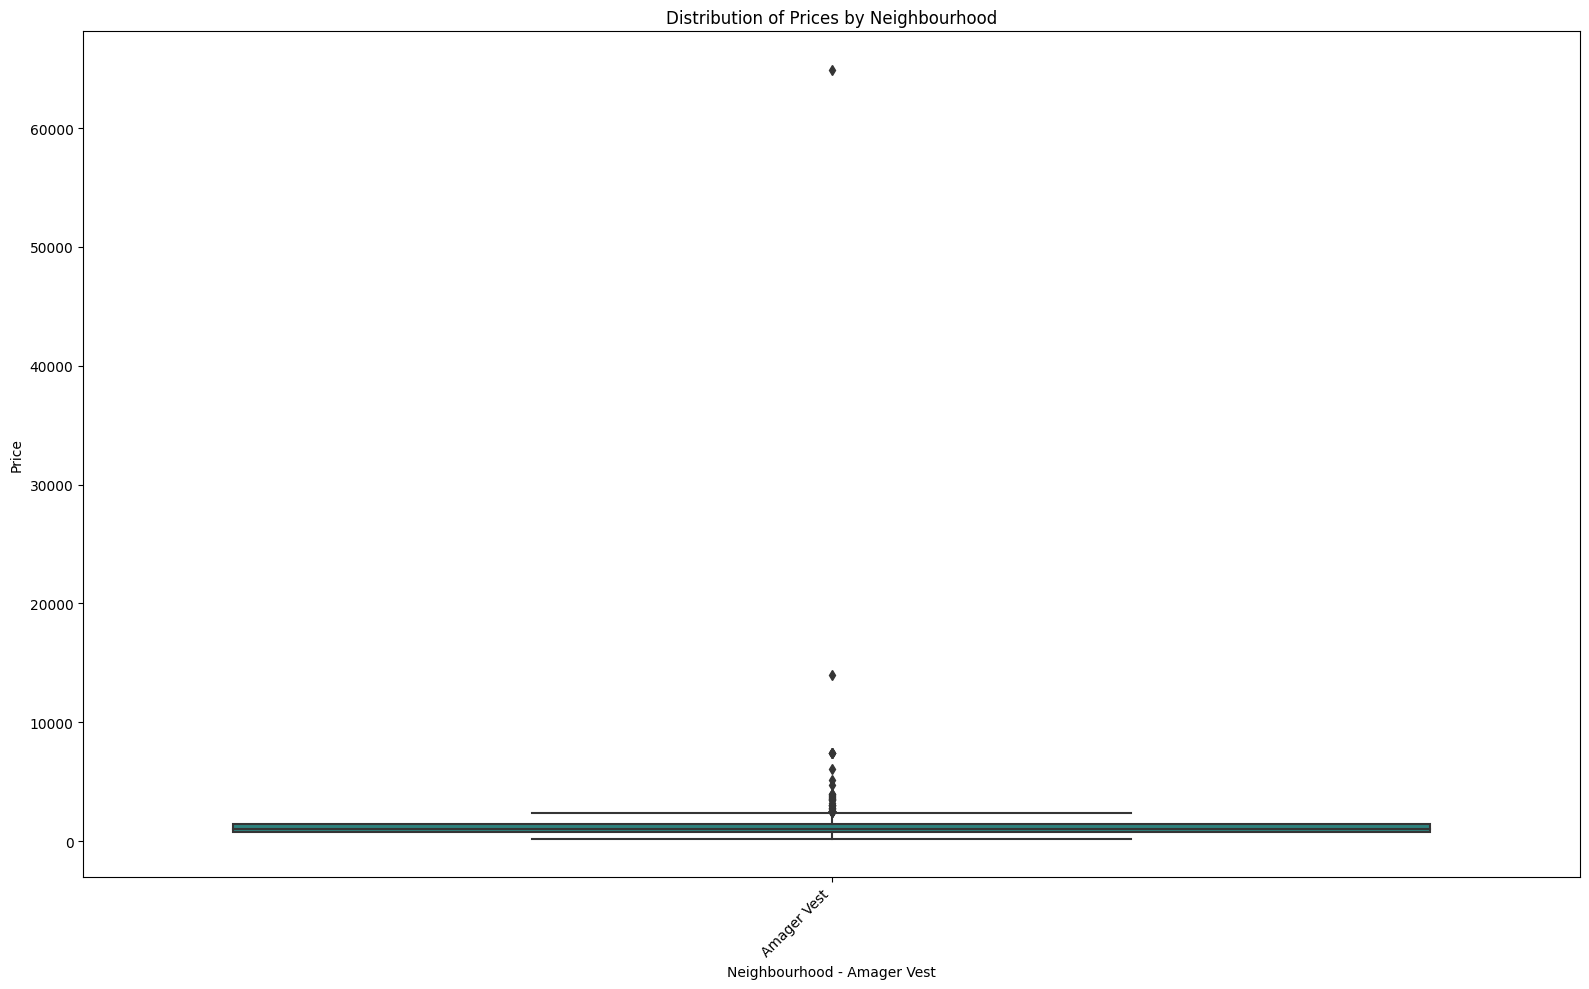

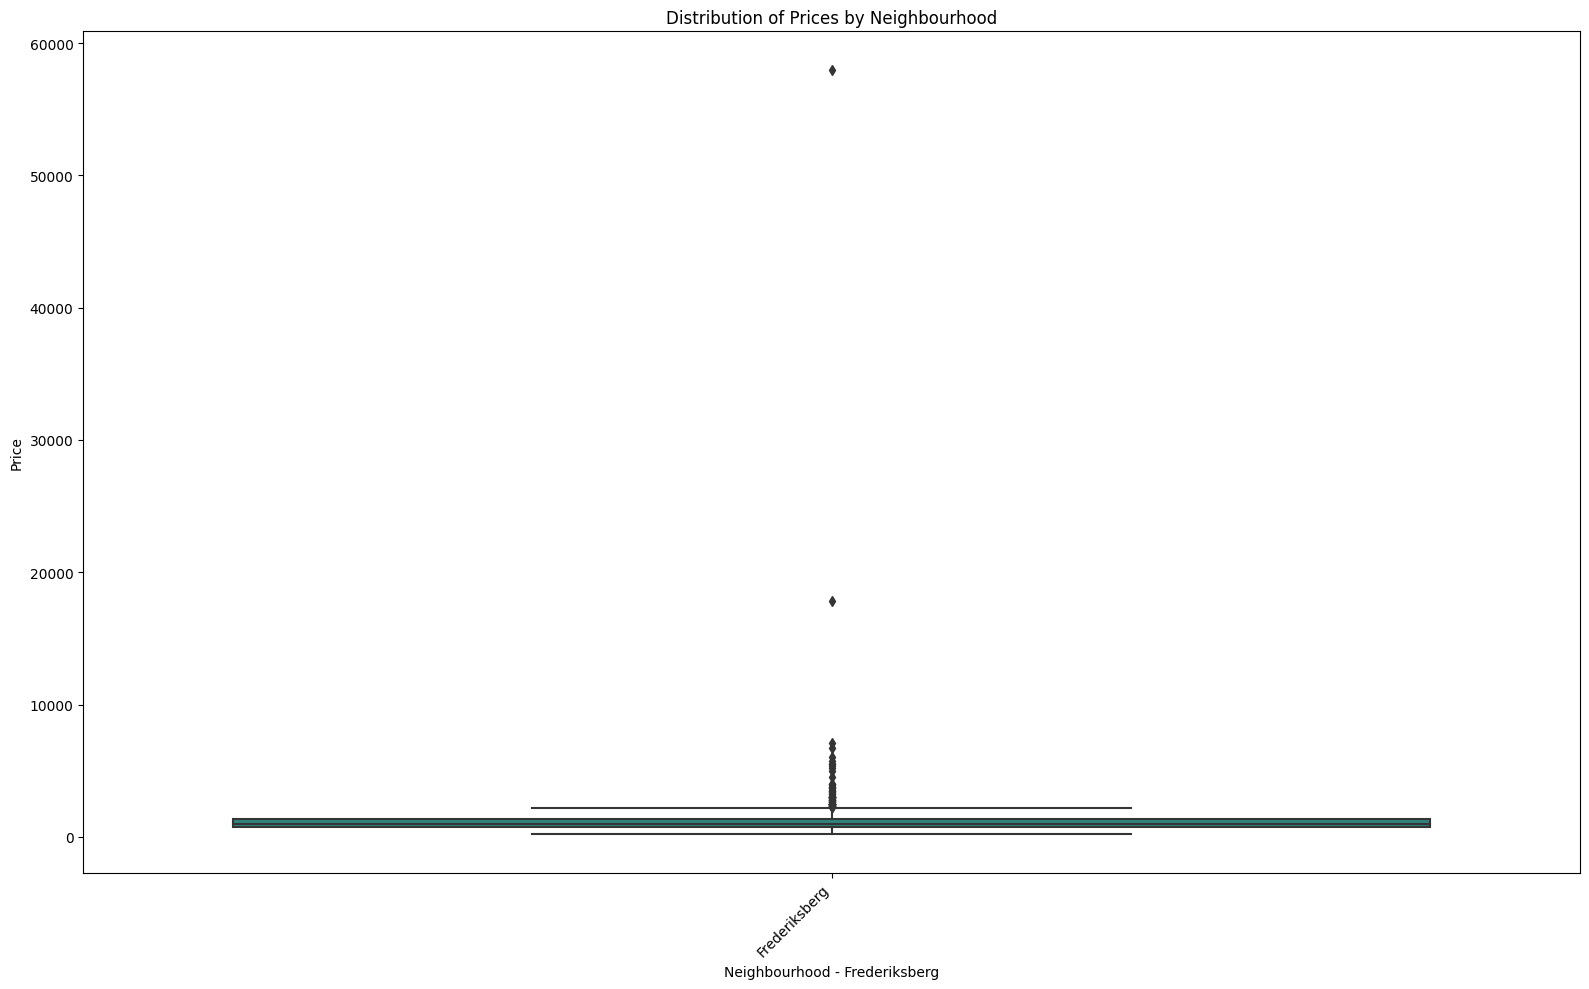

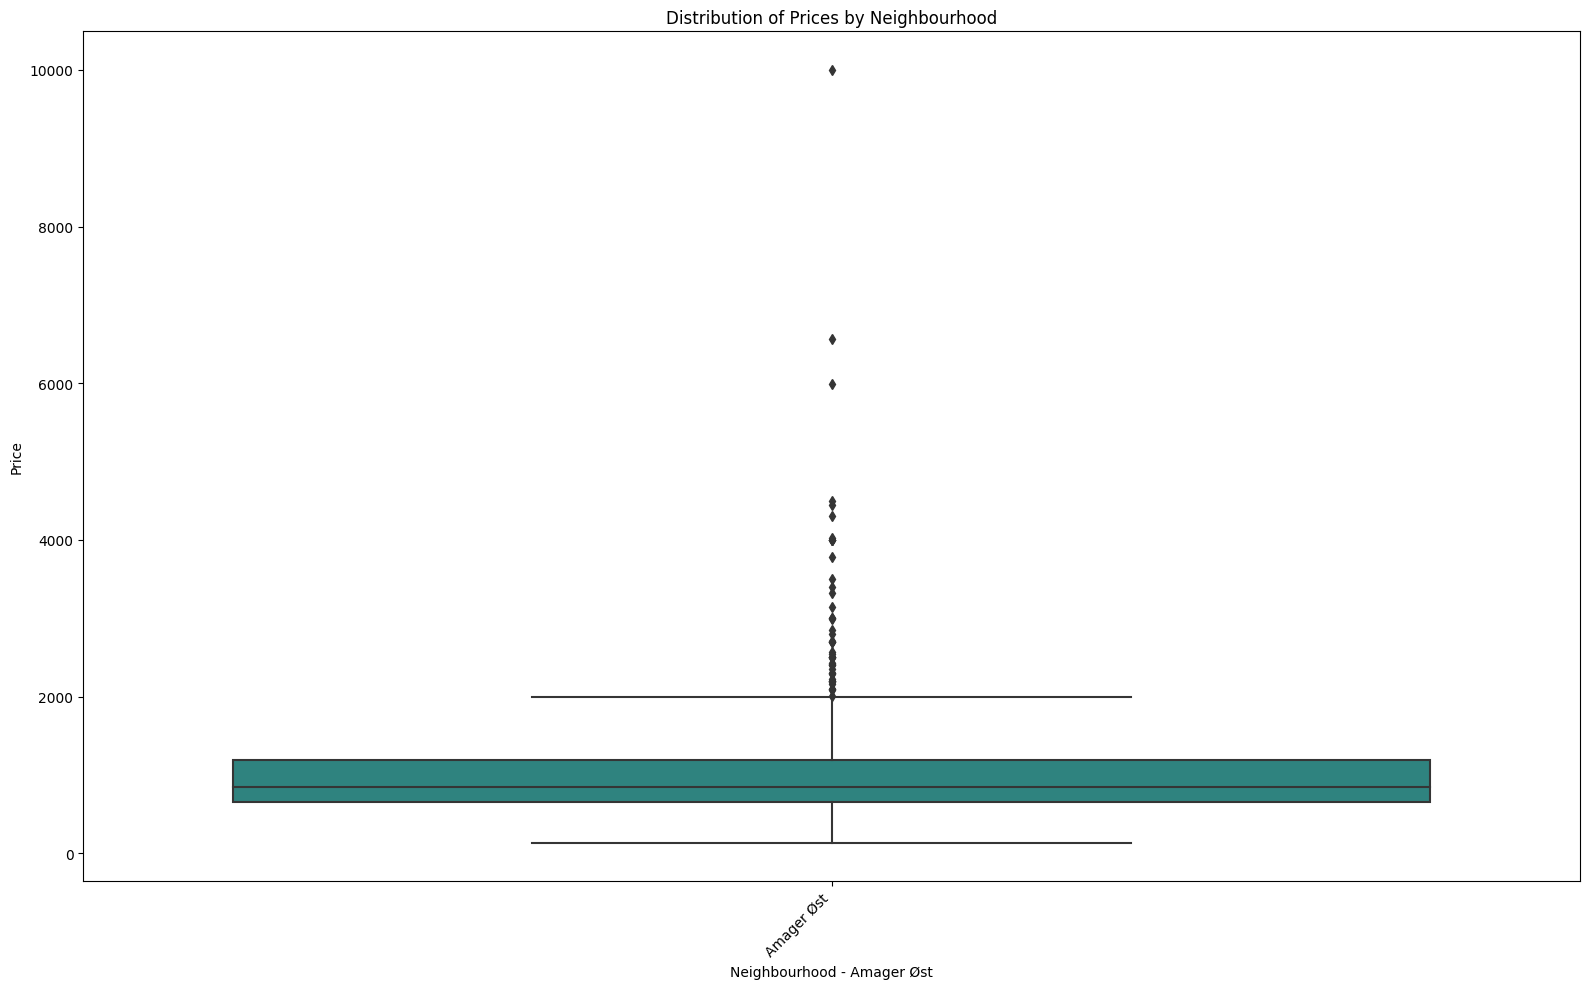

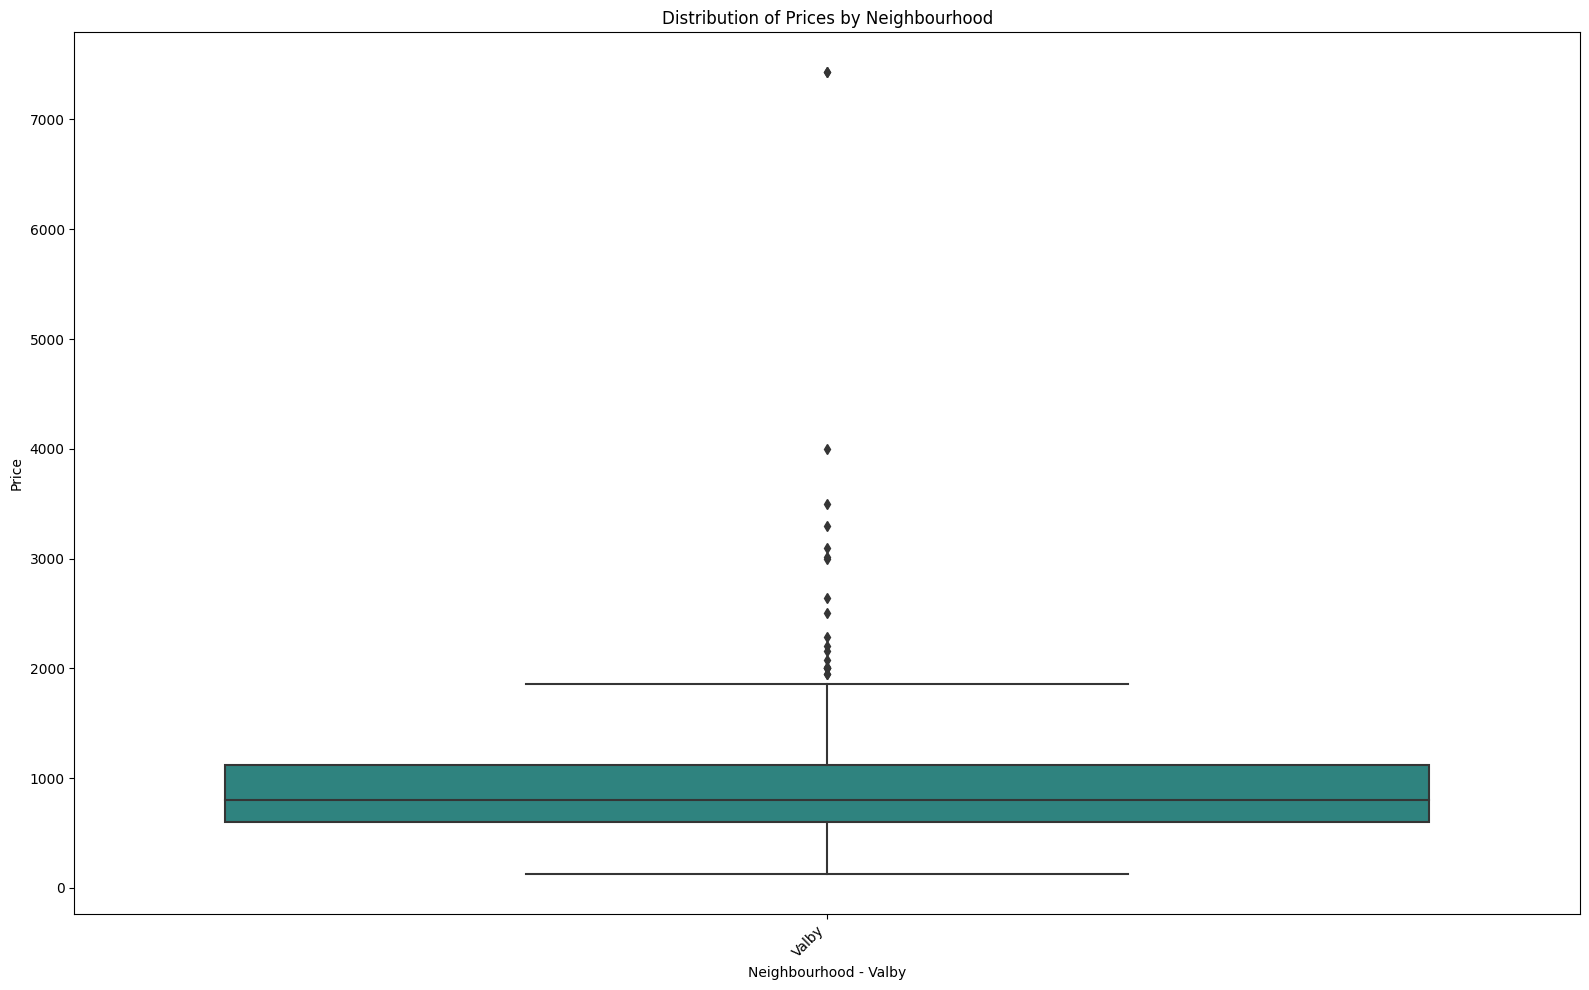

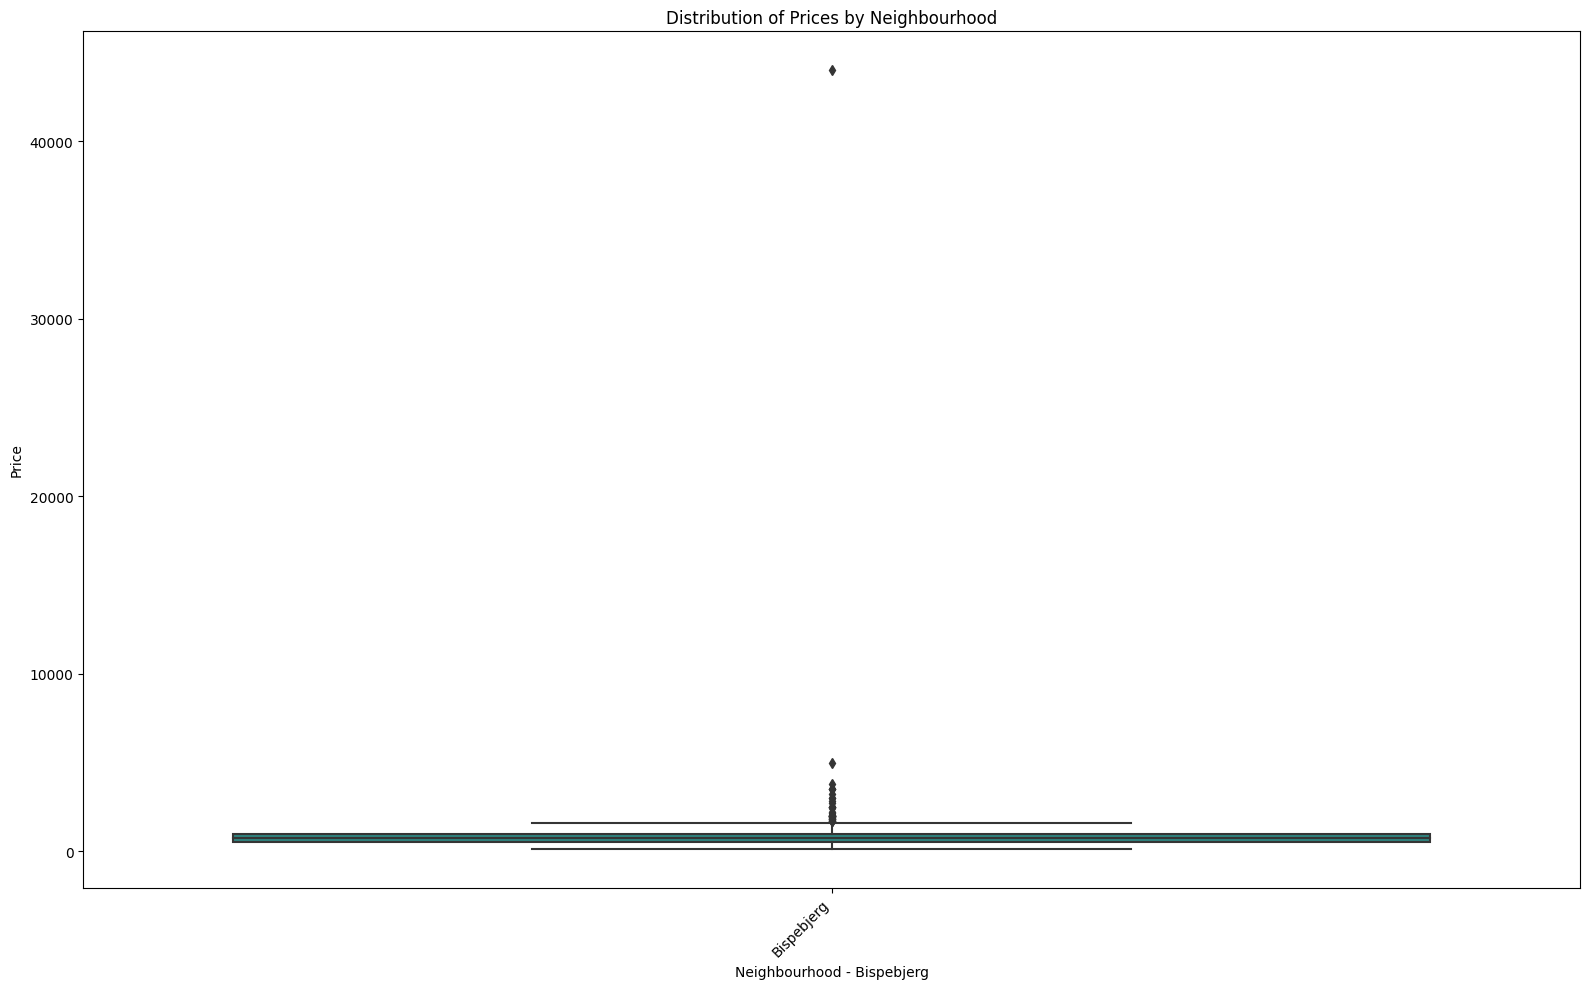

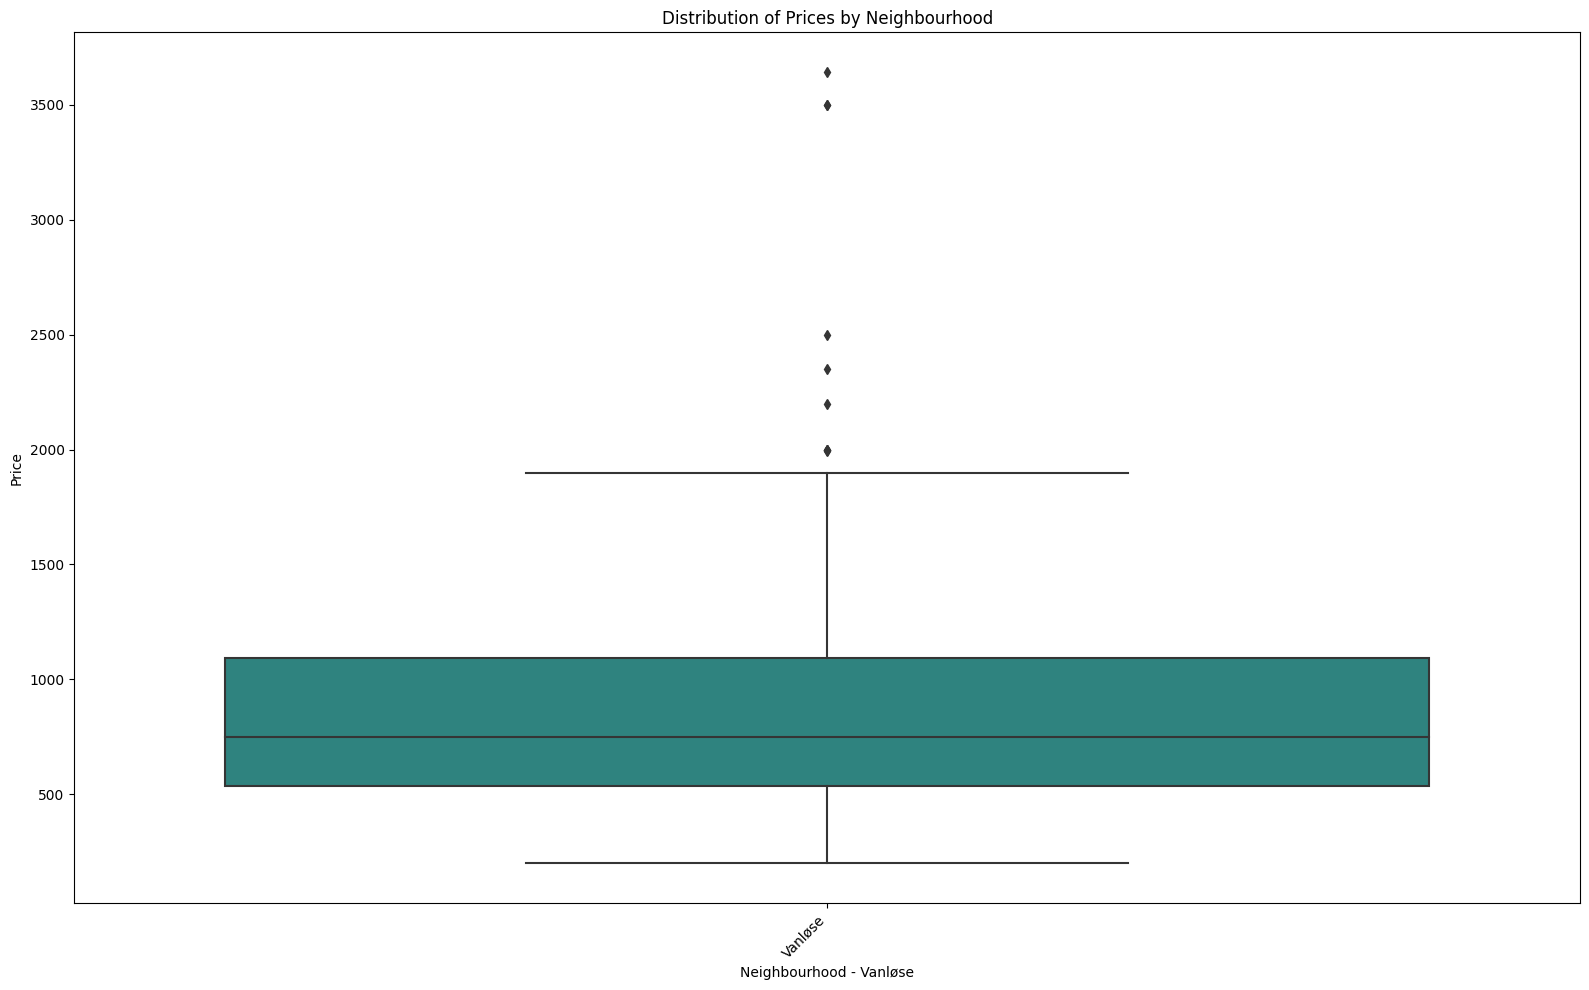

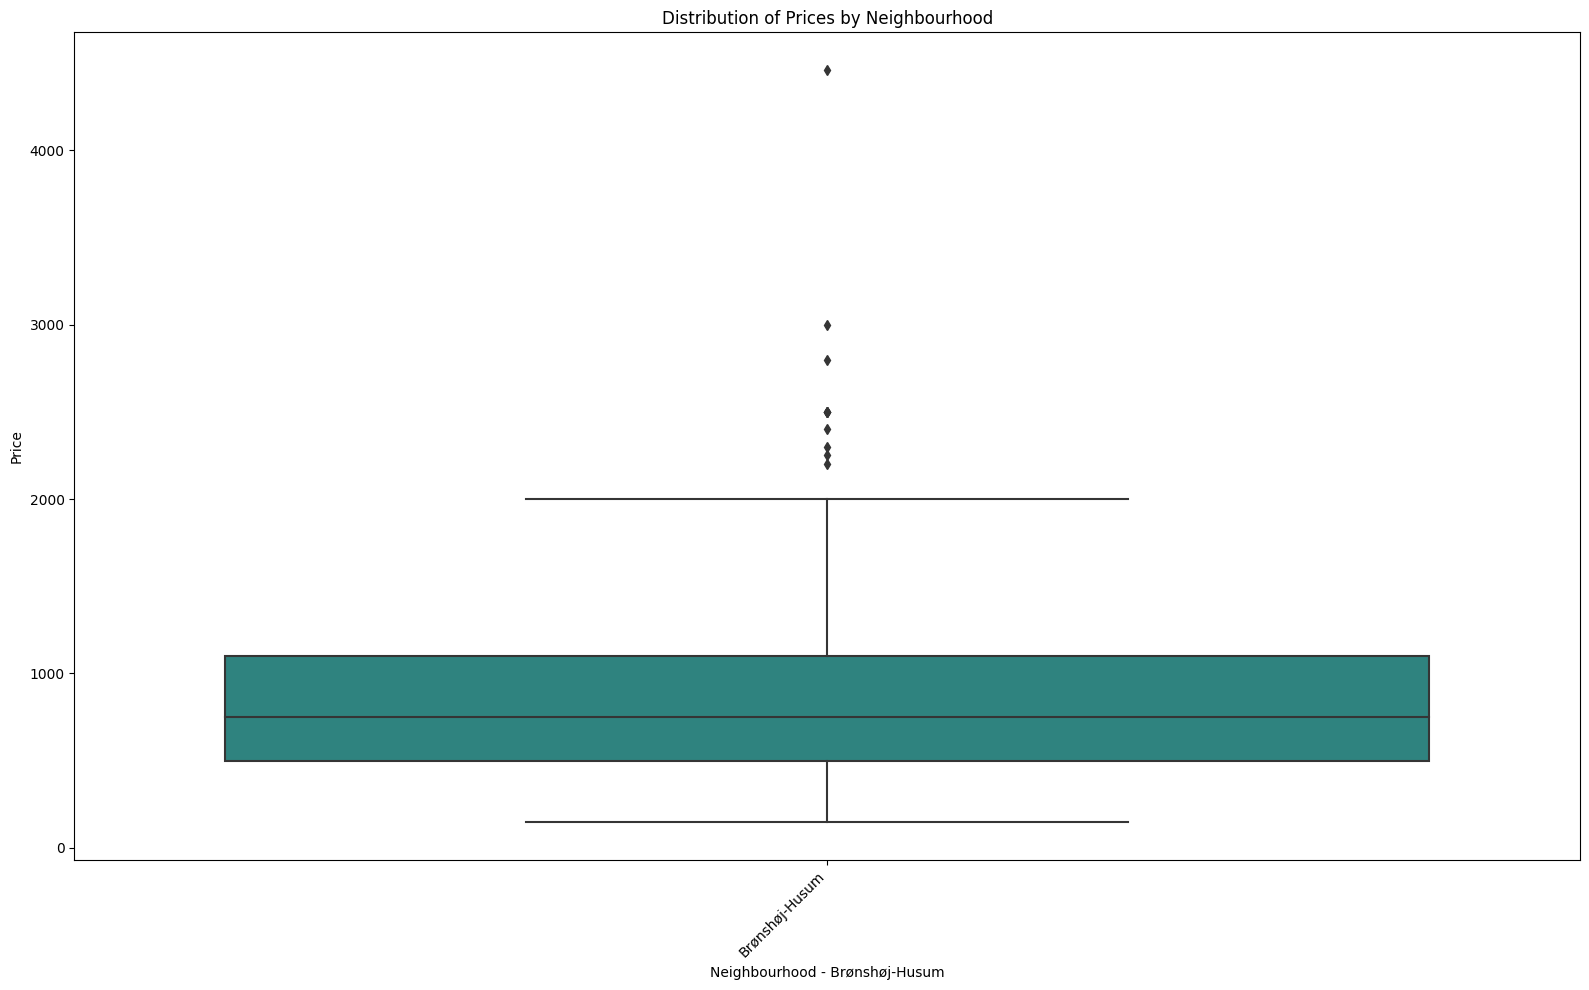

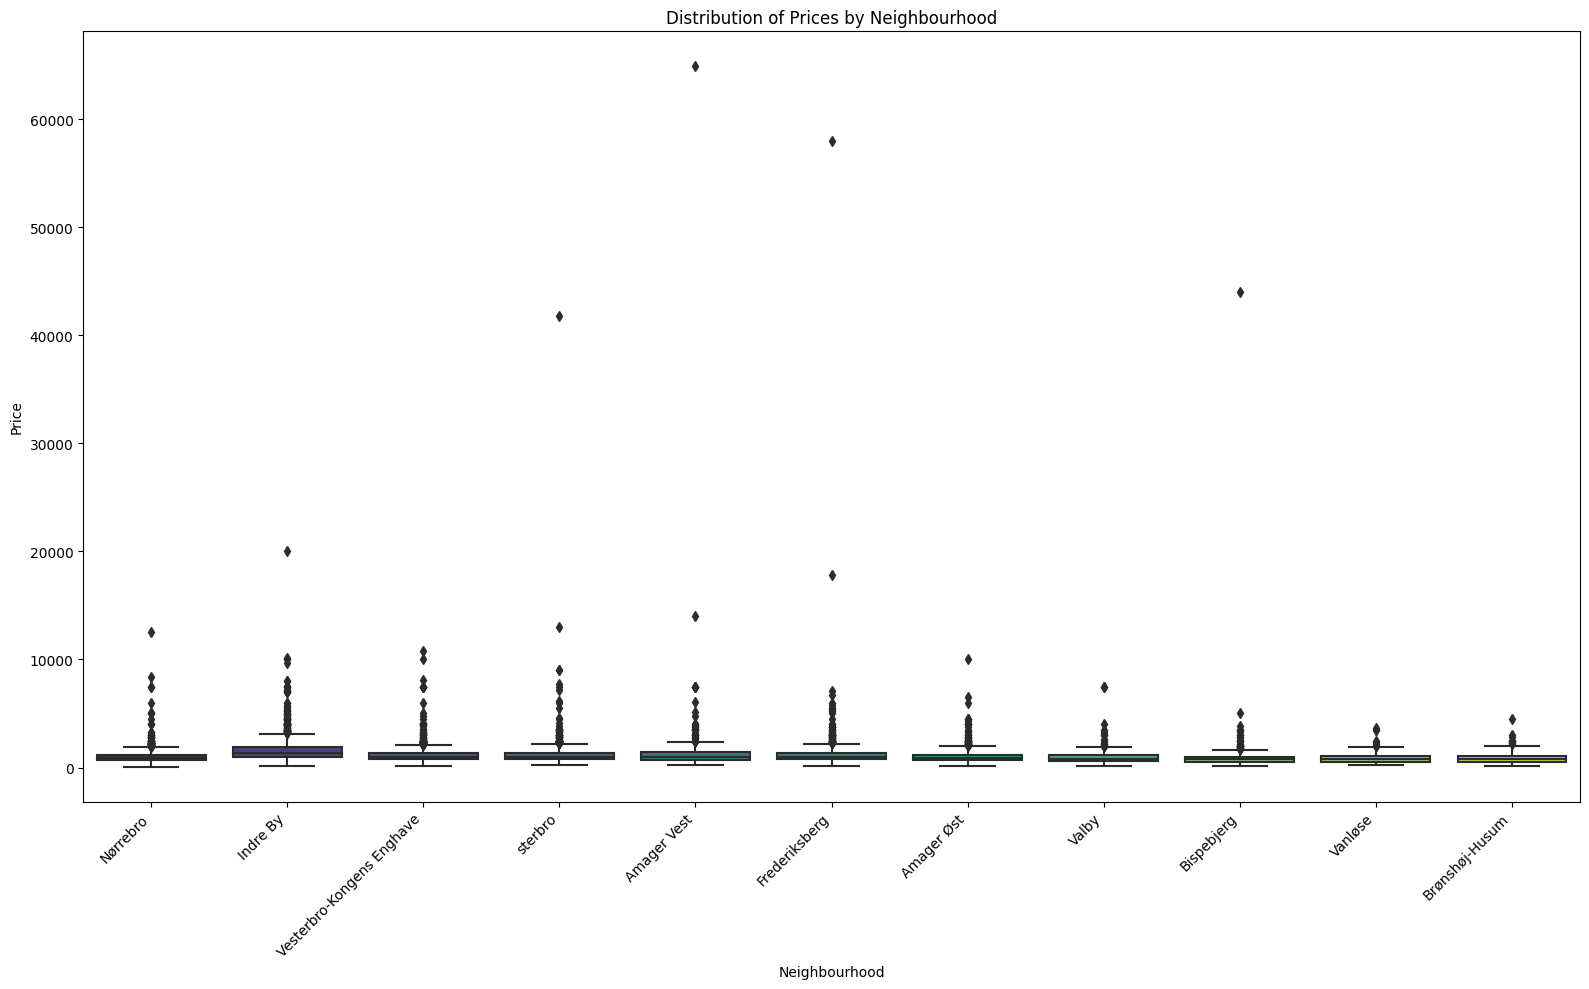

In [16]:
for neighbourhood in data['neighbourhood_cleansed'].unique():
    plt.figure(figsize=(16, 10))
    sns.boxplot(data=data[data['neighbourhood_cleansed'] == neighbourhood], x='neighbourhood_cleansed', y='price', palette='viridis')
    plt.title("Distribution of Prices by Neighbourhood")
    plt.ylabel("Price")
    plt.xlabel(f"Neighbourhood - {neighbourhood}")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()



plt.figure(figsize=(16, 10))
sns.boxplot(data=data, x='neighbourhood_cleansed', y='price', palette='viridis')
plt.title("Distribution of Prices by Neighbourhood")
plt.ylabel("Price")
plt.xlabel("Neighbourhood")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


- The pricing of the listings are right/positive skewed in most neighbourhoods, we can potentialy fix it by tranceforming the prices with either log(n) or sqrt(n).
- The median prices accross neighbourhoods varies
- The spread is broader in some neighbourhoods than others


## Review score ratings by neighbourhood

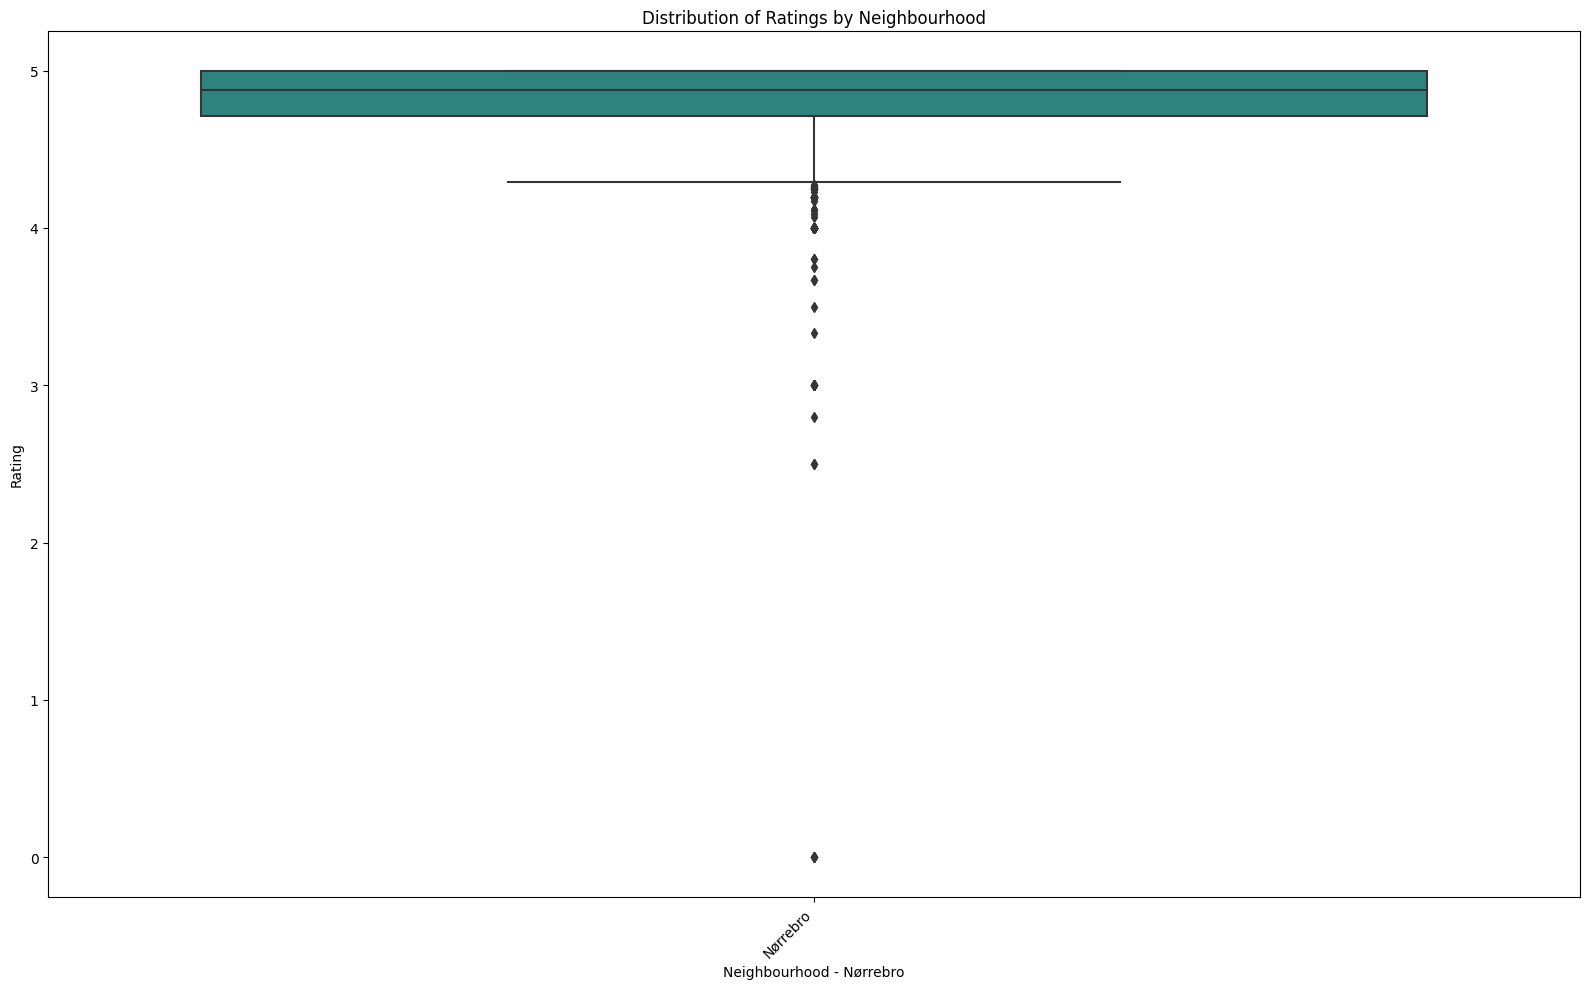

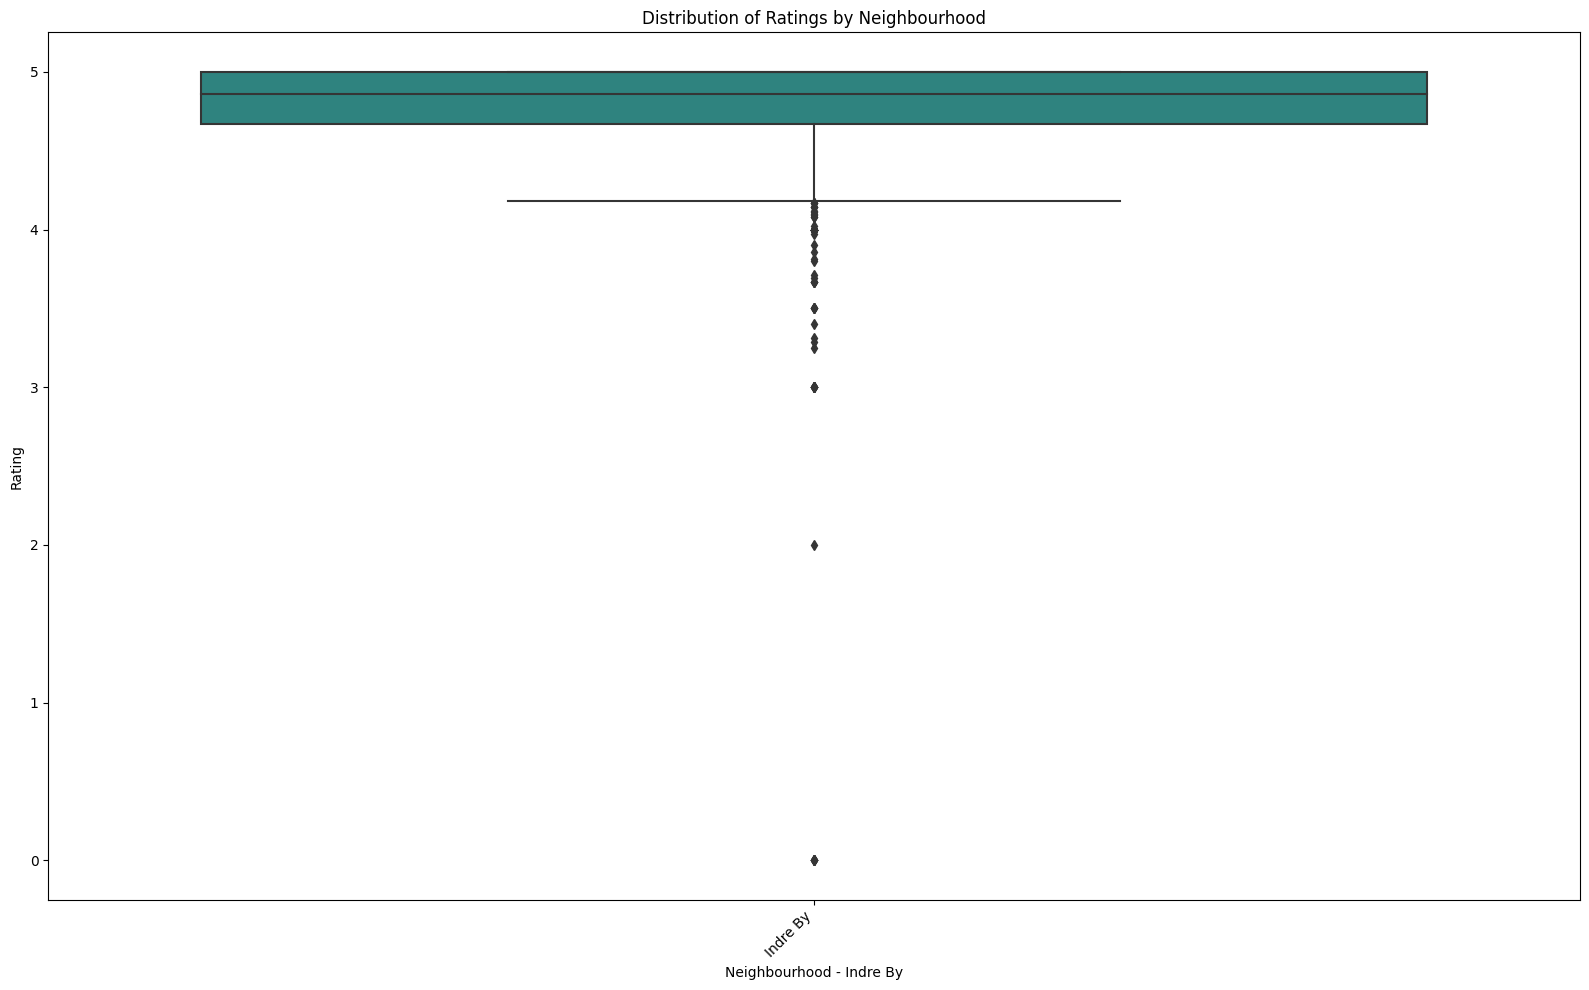

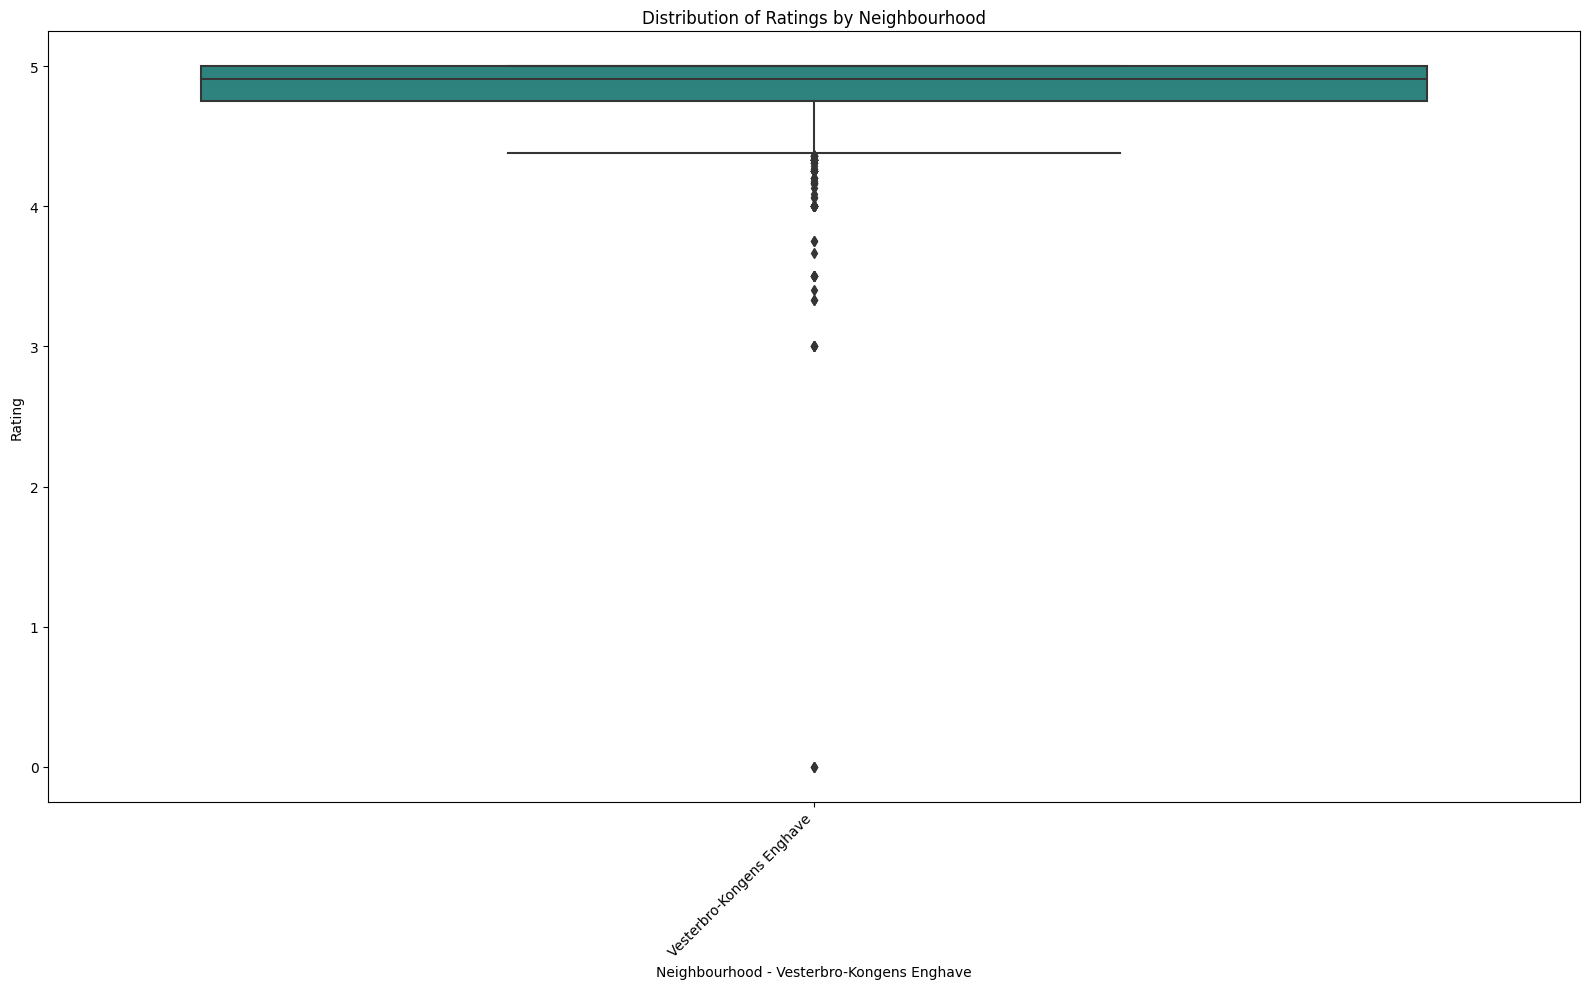

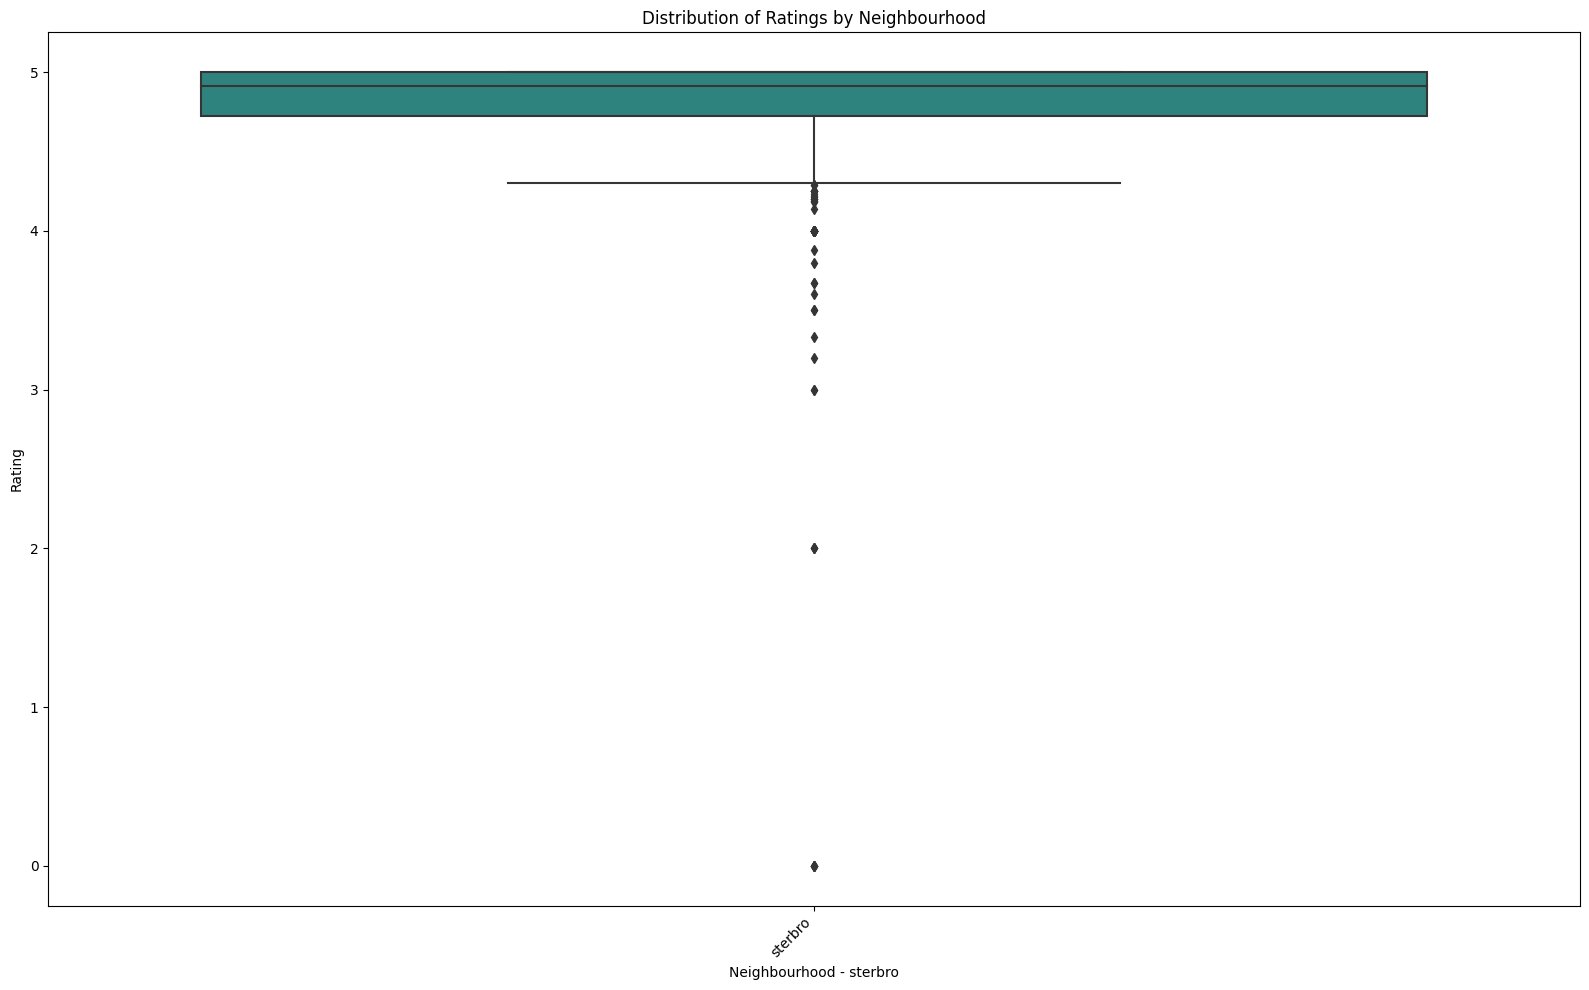

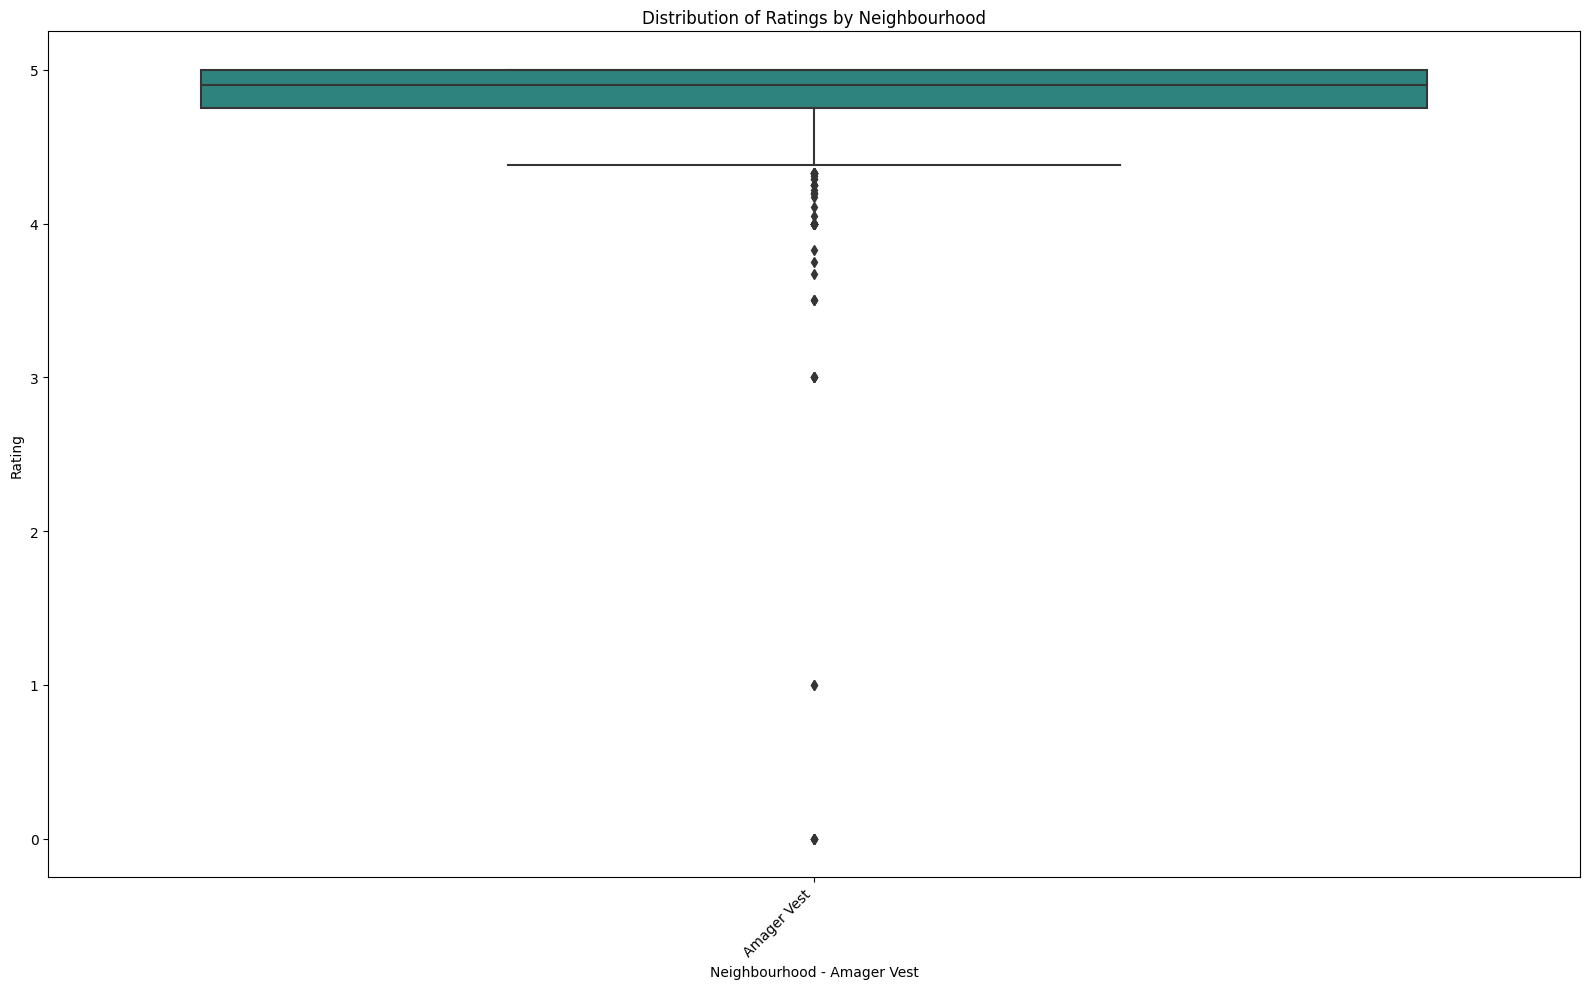

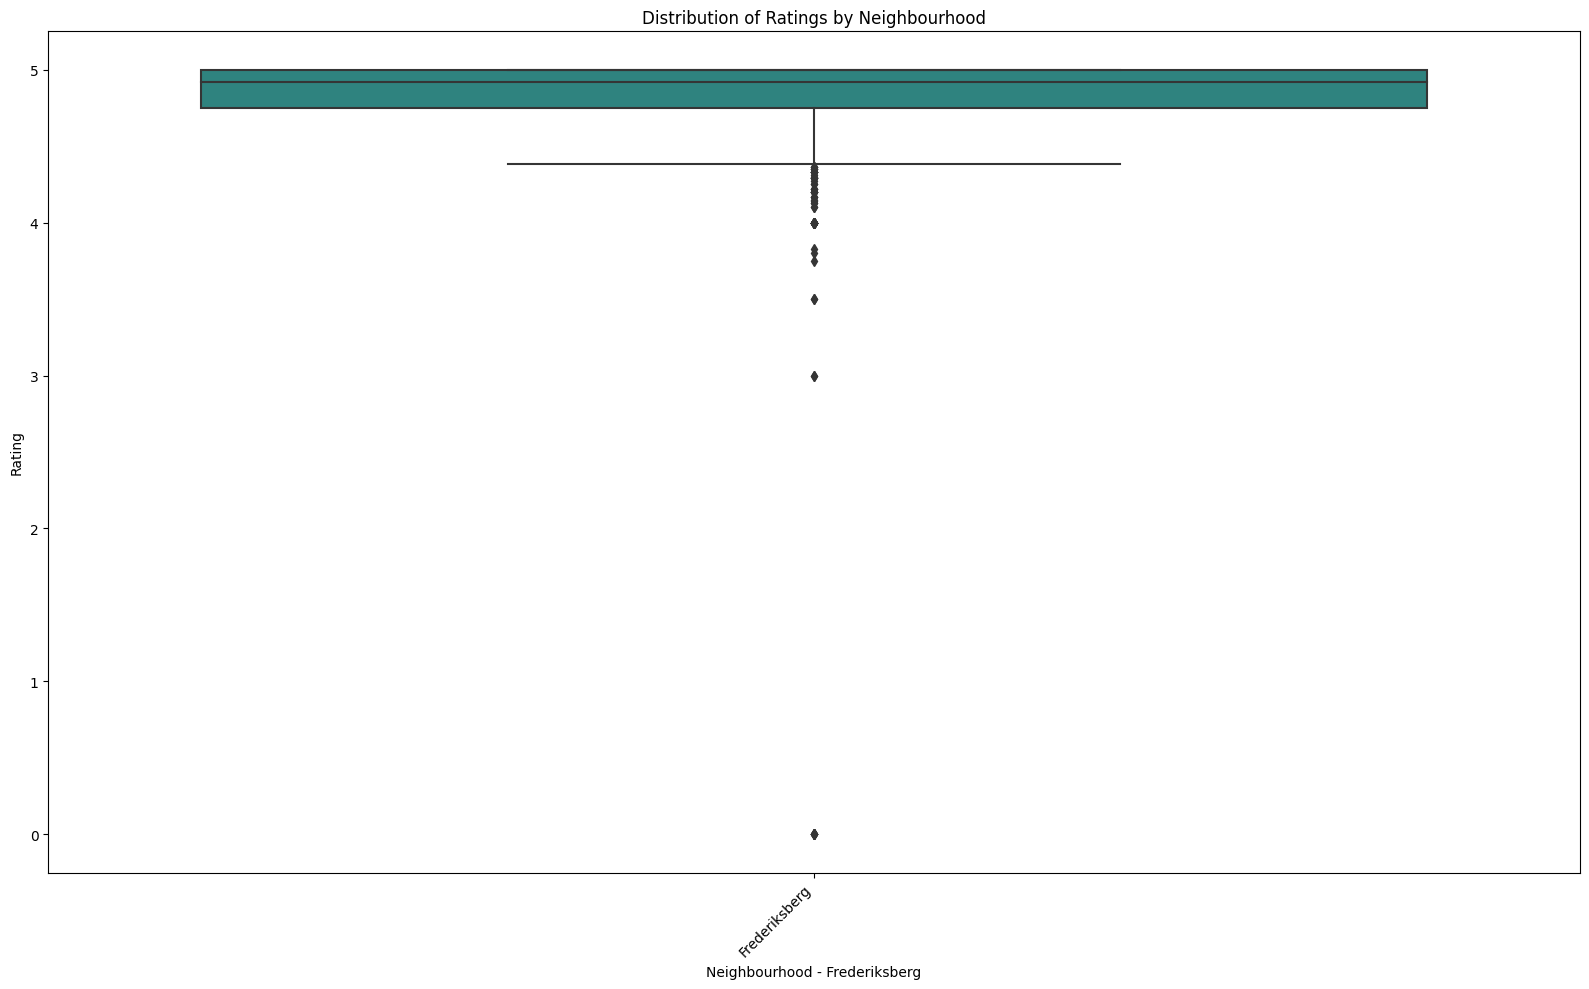

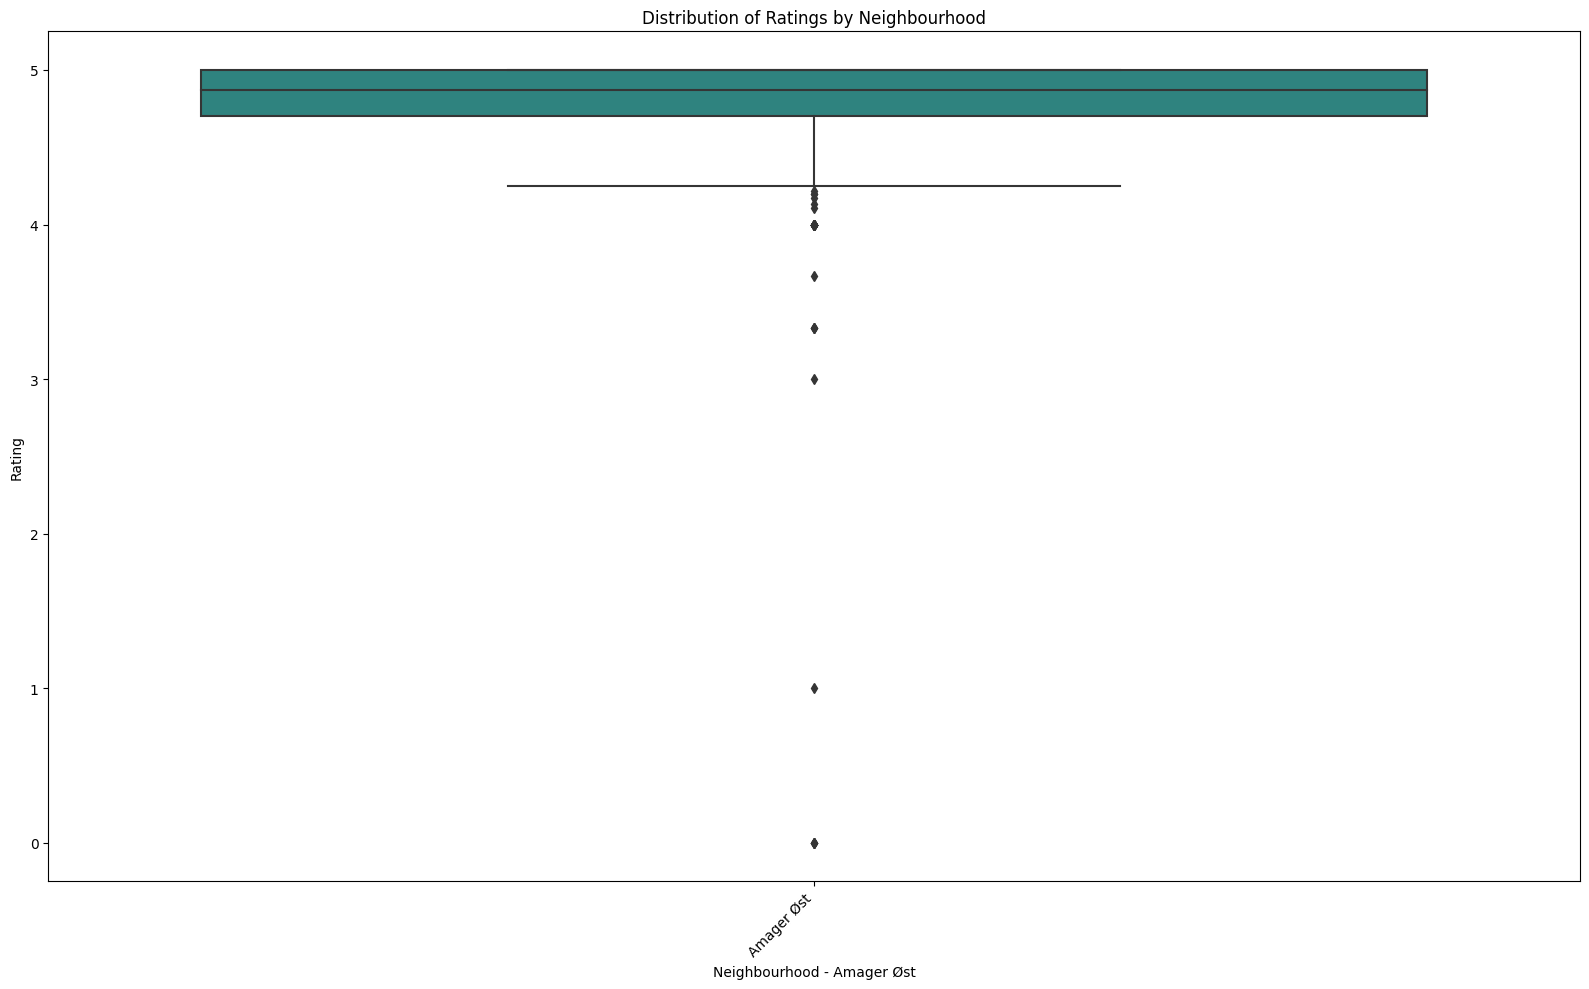

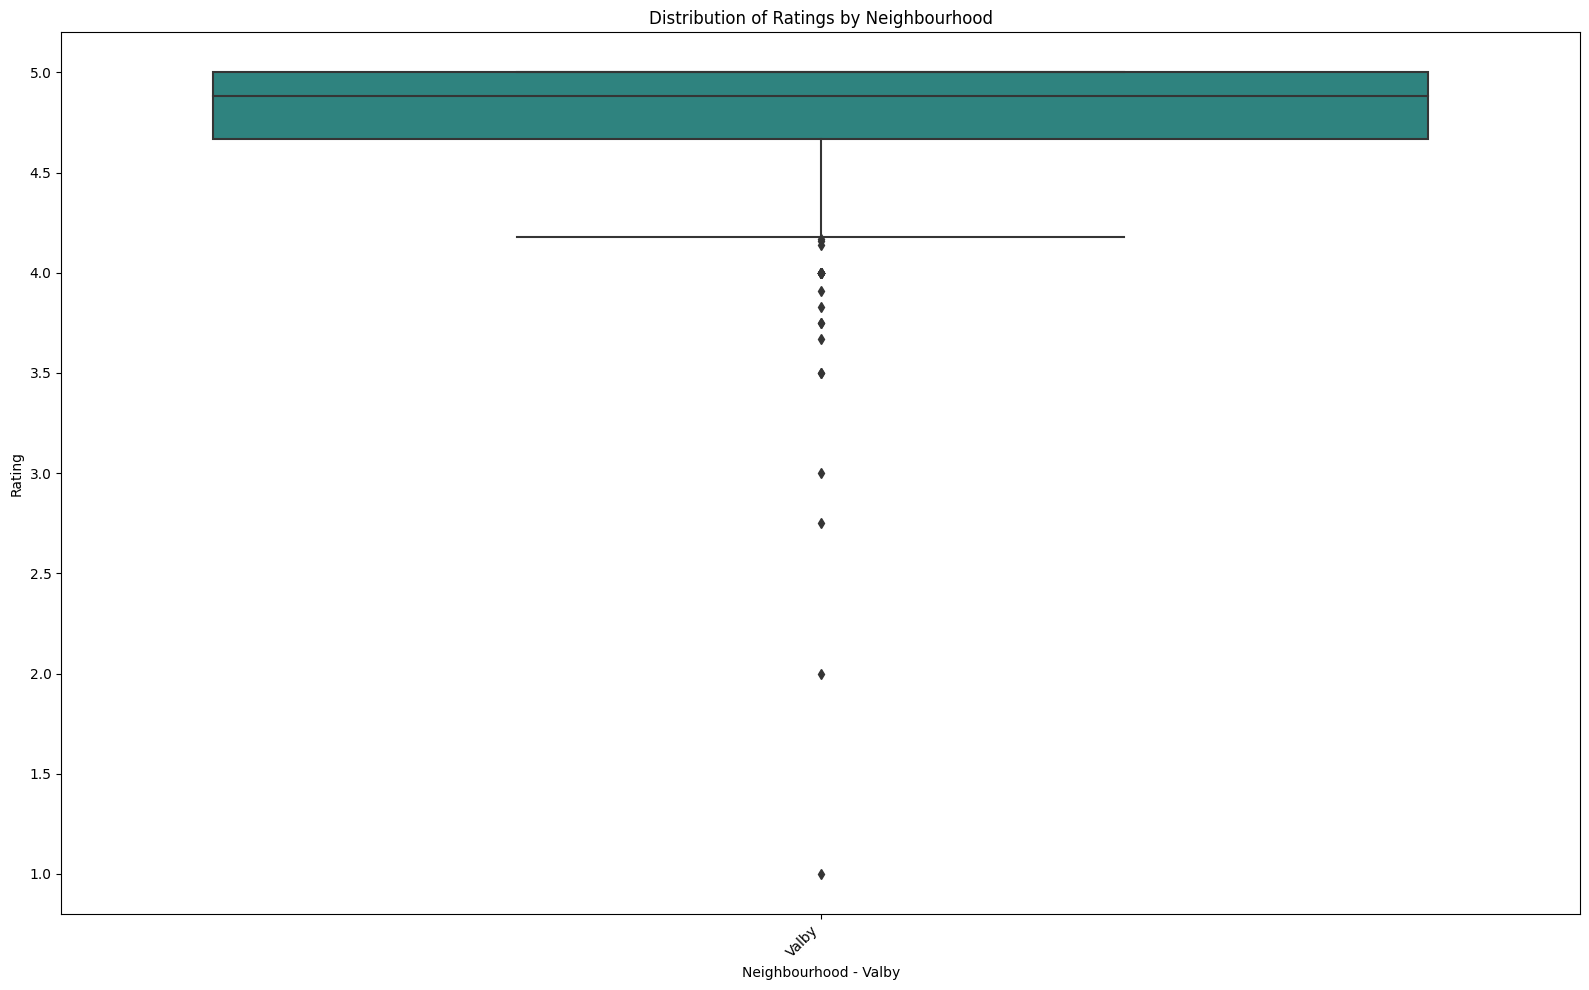

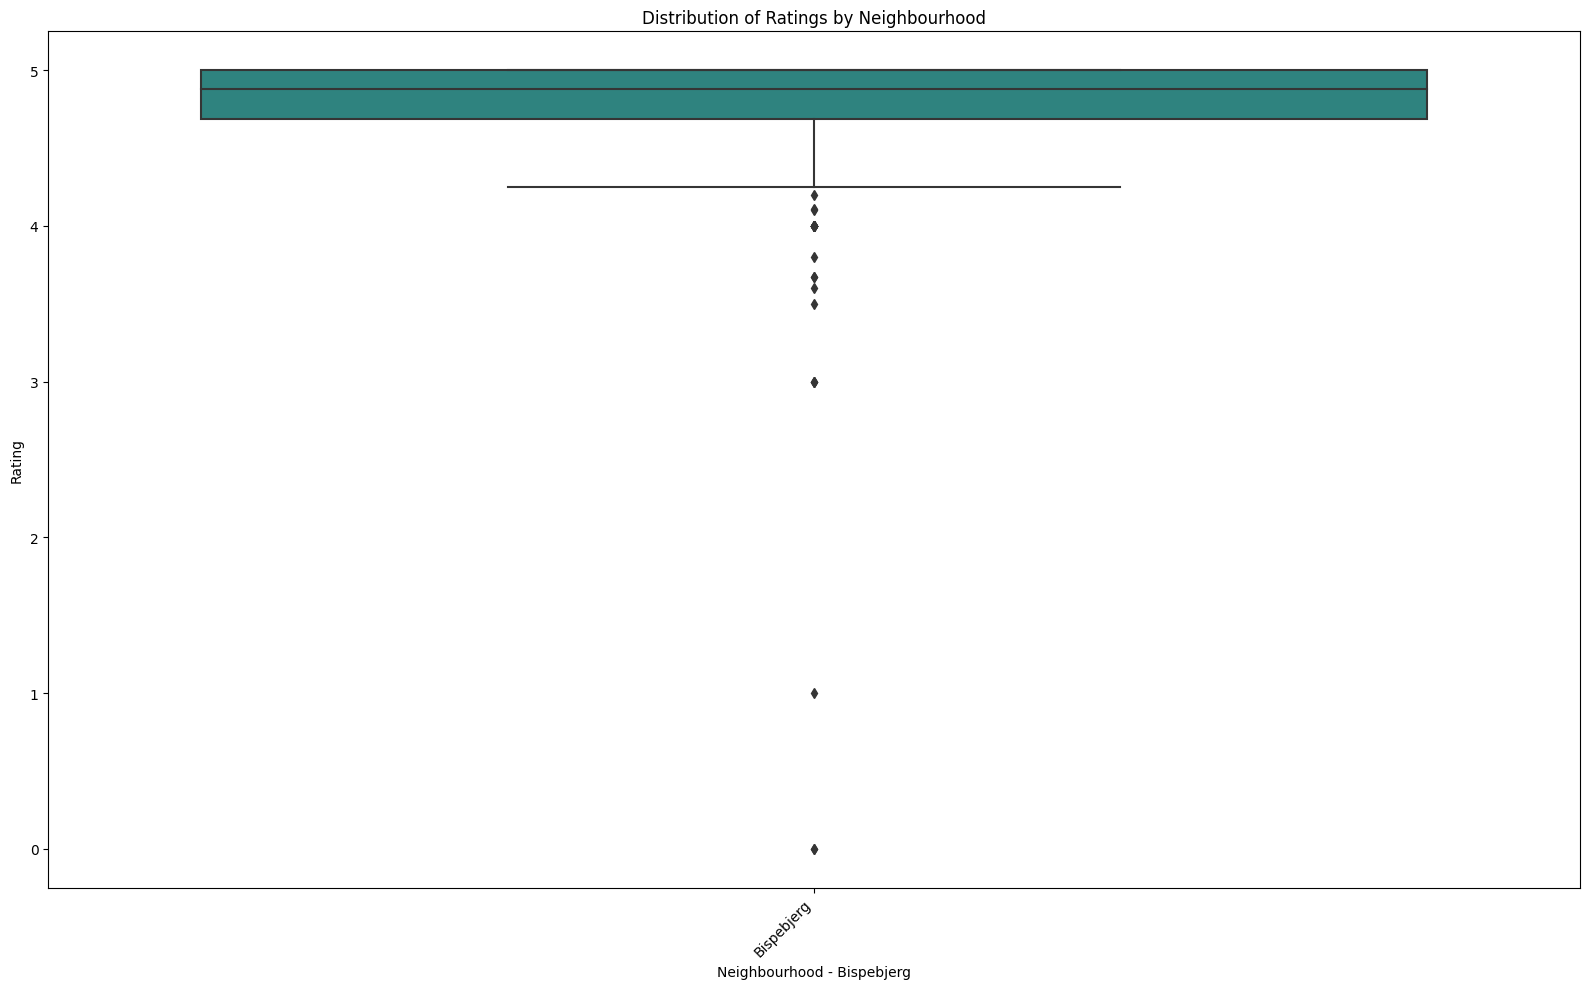

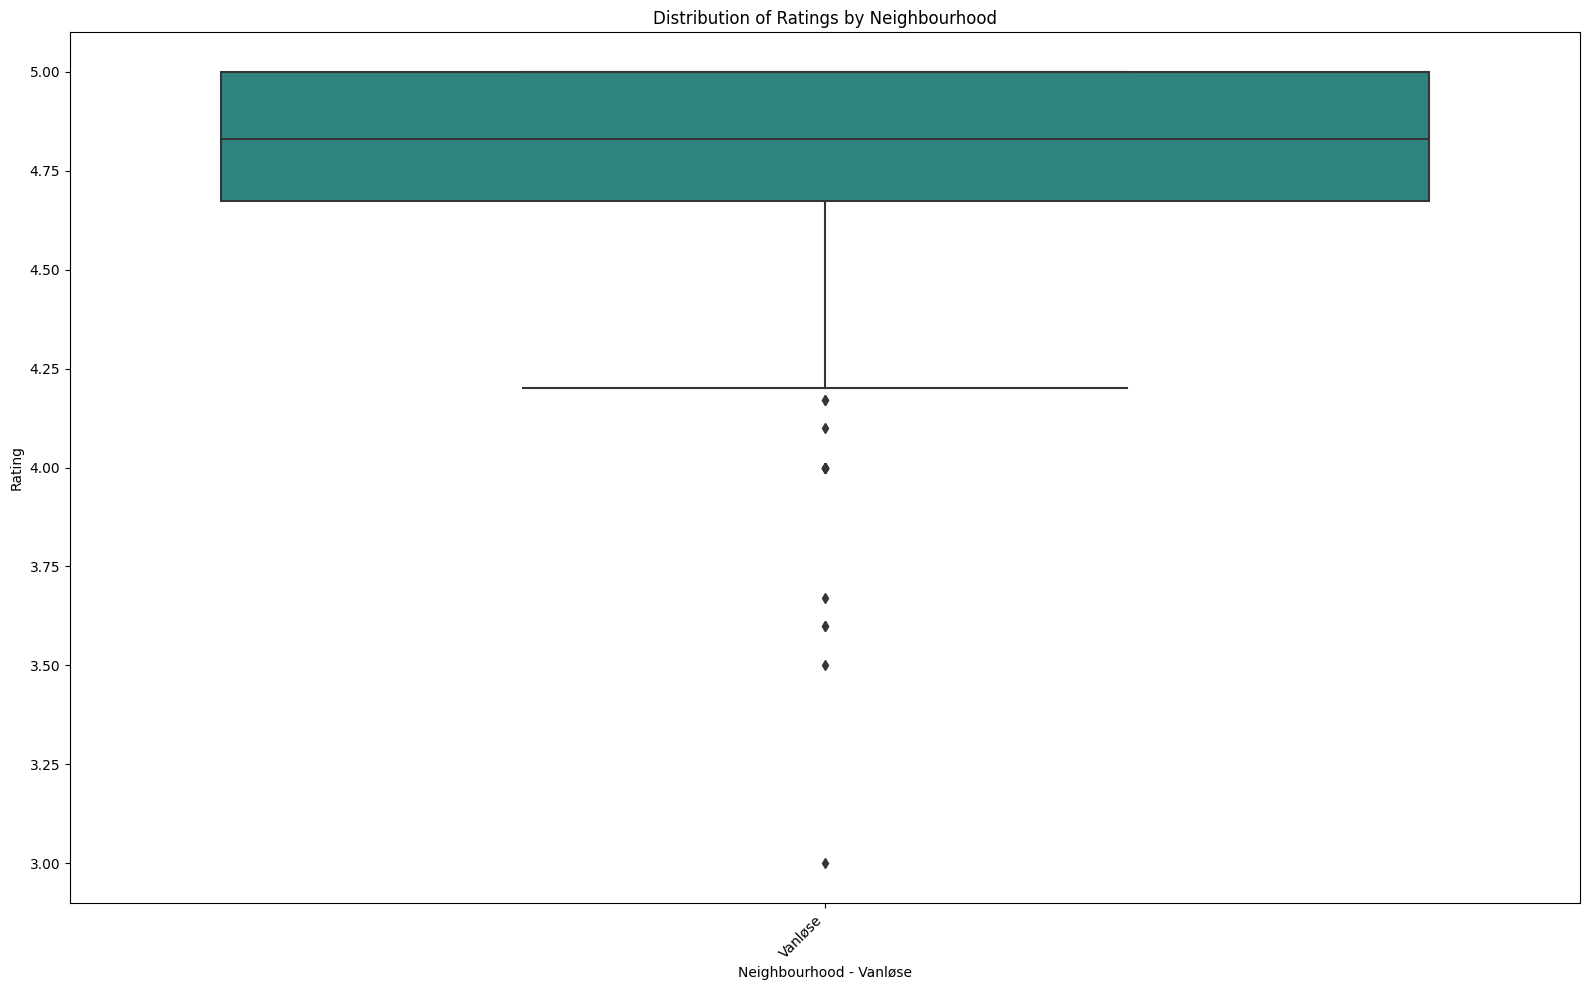

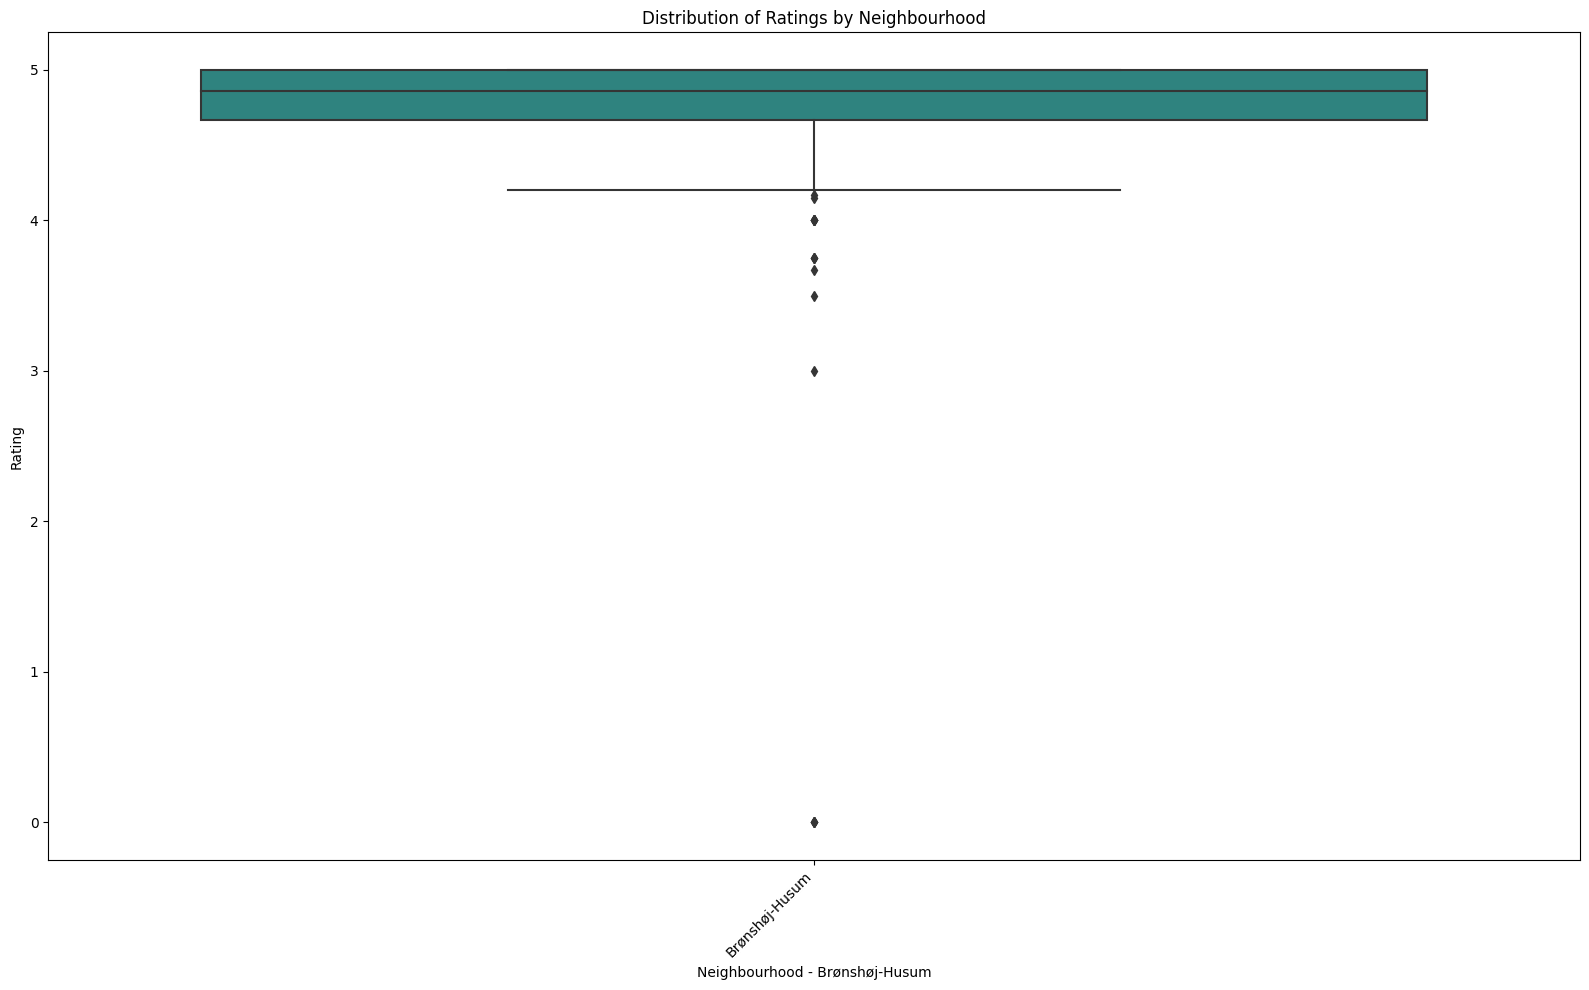

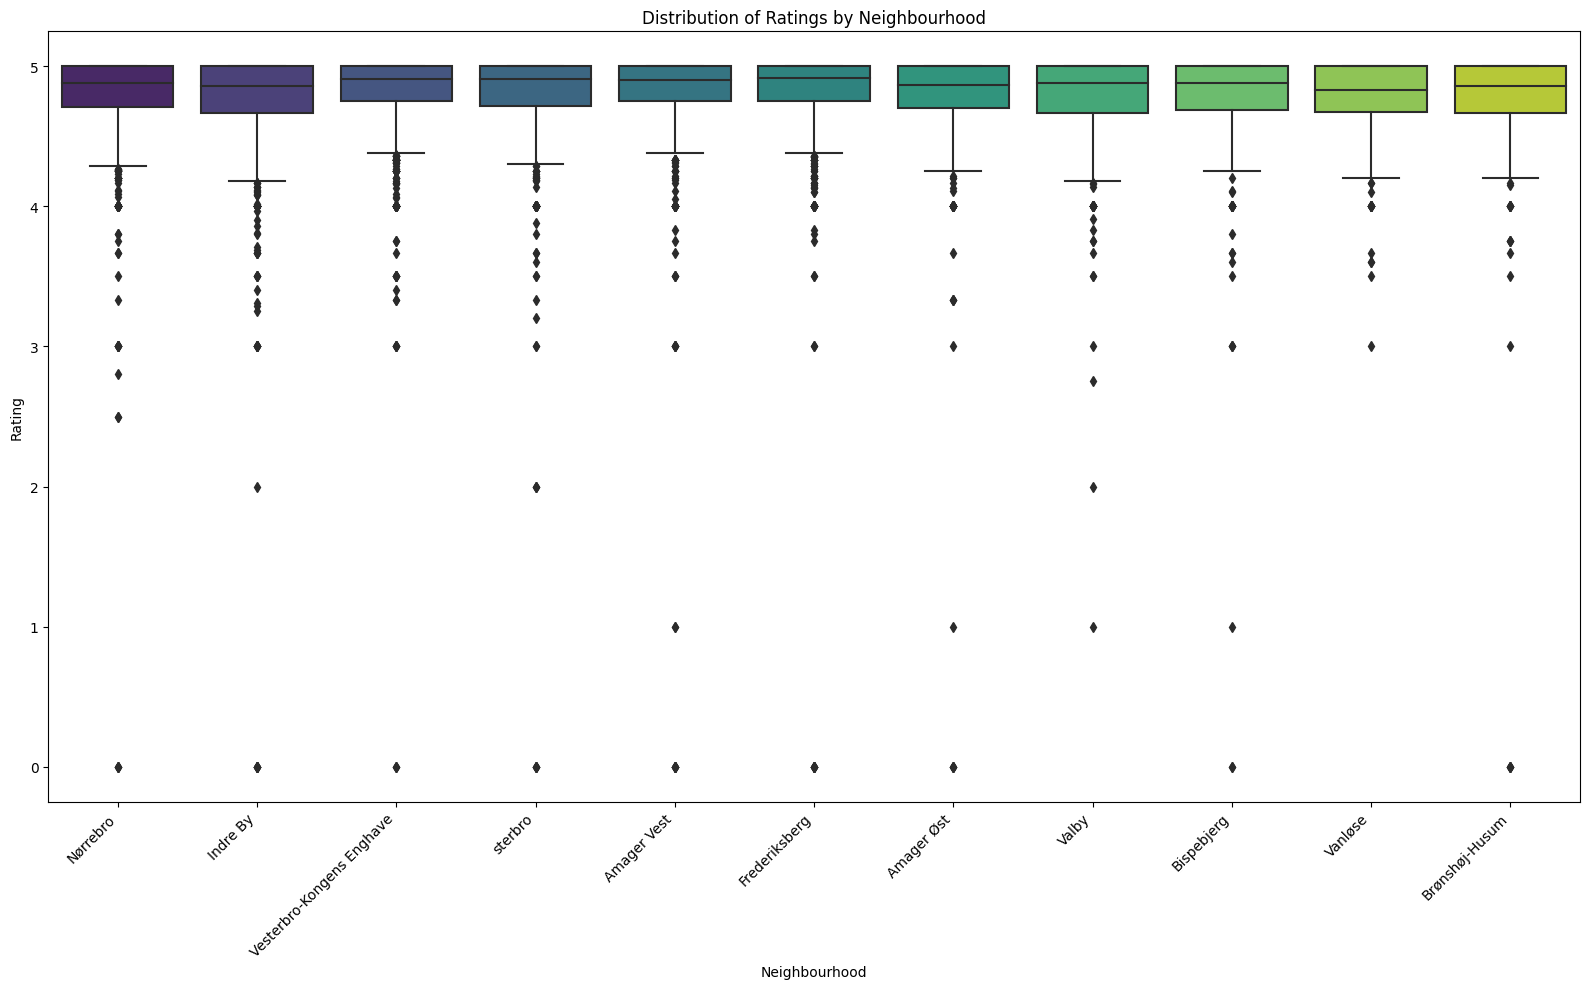

In [17]:
for neighbourhood in data['neighbourhood_cleansed'].unique():
    plt.figure(figsize=(16, 10))
    sns.boxplot(data=data[data['neighbourhood_cleansed'] == neighbourhood], x='neighbourhood_cleansed', y='review_scores_rating', palette='viridis')
    plt.title("Distribution of Ratings by Neighbourhood")
    plt.ylabel("Rating")
    plt.xlabel(f"Neighbourhood - {neighbourhood}")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()



plt.figure(figsize=(16, 10))
sns.boxplot(data=data, x='neighbourhood_cleansed', y='review_scores_rating', palette='viridis')
plt.title("Distribution of Ratings by Neighbourhood")
plt.ylabel("Rating")
plt.xlabel("Neighbourhood")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# 9 - Hosts with top ten most listings

In [18]:
top_hosts = data.groupby('host_id').size().reset_index(name='number_of_listings')
top_ten_hosts= top_hosts.sort_values(by='number_of_listings', ascending=False).head(10)

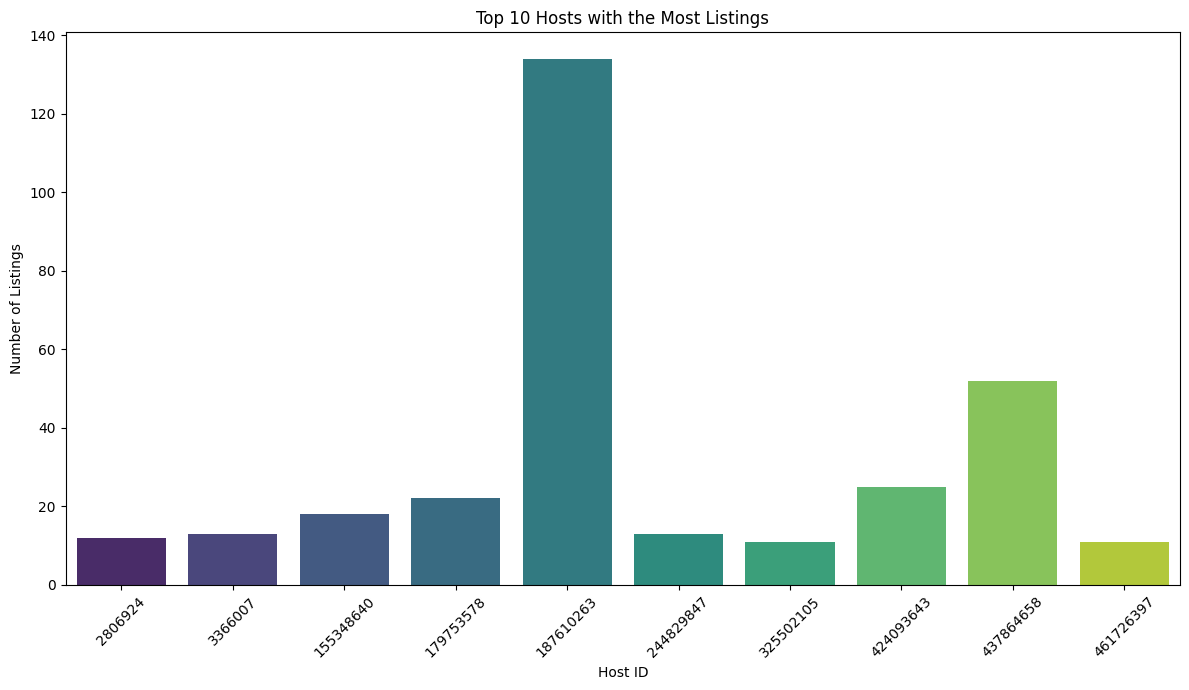

In [19]:
plt.figure(figsize=(12, 7))
sns.barplot(data=top_ten_hosts, x='host_id', y='number_of_listings', palette='viridis')
plt.title("Top 10 Hosts with the Most Listings")
plt.ylabel("Number of Listings")
plt.xlabel("Host ID")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 10 - Descriptive analysis of the neighbourhoods

## Descriptive statistics

In [20]:
price_stats = data['price'].describe()
price_stats

count    12170.000000
mean      1156.165982
std       1239.248769
min         79.000000
25%        720.000000
50%        979.000000
75%       1328.000000
max      64900.000000
Name: price, dtype: float64

## Price mode by neighbourhood

In [21]:
price_mode = data.groupby('neighbourhood_cleansed')['price'].apply(lambda x: x.mode().iloc[0]).rename('mode')
price_stats = pd.concat([price_stats, price_mode], axis=1)
price_mode

neighbourhood_cleansed
Amager Vest                  1000.0
Amager Øst                   1000.0
Bispebjerg                    700.0
Brønshøj-Husum                500.0
Frederiksberg                1000.0
Indre By                     1200.0
Nørrebro                     1000.0
Valby                         700.0
Vanløse                      1200.0
Vesterbro-Kongens Enghave    1000.0
sterbro                      1000.0
Name: mode, dtype: float64

## Room types

In [22]:
room_type_counts = data.groupby(['neighbourhood_cleansed', 'room_type']).size().unstack().fillna(0)
room_type_counts


room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood_cleansed,,,,
Amager Vest,915.0,0.0,149.0,2.0
Amager Øst,793.0,3.0,131.0,1.0
Bispebjerg,510.0,0.0,96.0,1.0
Brønshøj-Husum,217.0,0.0,70.0,2.0
Frederiksberg,1050.0,0.0,133.0,0.0
Indre By,1707.0,10.0,130.0,4.0
Nørrebro,1892.0,0.0,166.0,3.0
Valby,450.0,0.0,89.0,0.0
Vanløse,254.0,0.0,44.0,0.0


In [23]:
data[data['neighbourhood_cleansed'] == 'Vesterbro-Kongens Enghave']['price'].describe()

count     2037.000000
mean      1114.140893
std        692.293635
min        186.000000
25%        760.000000
50%        999.000000
75%       1299.000000
max      10800.000000
Name: price, dtype: float64

In [24]:
data[data['neighbourhood_cleansed'] == 'Brønshøj-Husum']['price'].describe()


count     289.000000
mean      869.422145
std       550.705729
min       145.000000
25%       498.000000
50%       750.000000
75%      1100.000000
max      4462.000000
Name: price, dtype: float64

# 11 - Top 10 highest rated listings visualized


In [25]:
top_highest_rated_listings = data.sort_values(by='review_scores_value', ascending=False).head(10)
top_highest_rated_listings

,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365,price_category
6389,37910434,Great apartment near Copenhagen City center,12314143,René,Amager Vest,55.66529,12.59749,Entire home/apt,750.0,5,...,5.0,5.00,5.0,5.0,5.00,5.0,0.03,1,267,1
7827,46956246,Modern bright 2 bedroom apartment by the harbour,155348640,Forenom Denmark,Vesterbro-Kongens Enghave,55.64782,12.55258,Entire home/apt,7429.0,1,...,5.0,5.00,5.0,5.0,5.00,5.0,0.08,82,0,8
7883,47541044,Great apartment Islands brygge. Private parking,40606471,Jesper,Amager Vest,55.66808,12.57995,Entire home/apt,14000.0,4,...,5.0,4.50,5.0,5.0,4.75,5.0,0.20,1,180,11
7881,47533228,Lovely Nørrebro - The Heart of it!,14245180,Guillaume,Nørrebro,55.69199,12.56481,Entire home/apt,2446.0,2,...,5.0,5.00,5.0,5.0,5.00,5.0,0.27,8,83,3
7877,47469144,Located central in CPH close to green areas,143048095,Brian,Nørrebro,55.70522,12.55011,Private room,350.0,2,...,5.0,5.00,5.0,5.0,5.00,5.0,0.05,1,0,1
7872,47422441,Skøn lejlighed på Indre Nørrebro,382824695,Maria,Nørrebro,55.69018,12.56145,Entire home/apt,1200.0,2,...,5.0,4.71,5.0,5.0,5.00,5.0,0.95,1,273,2
7856,47106651,Modern and spacious 2 bedroom apartment locate...,155348640,Forenom Denmark,Valby,55.65514,12.50454,Entire home/apt,7429.0,1,...,5.0,4.00,5.0,5.0,2.00,5.0,0.07,82,0,8
7844,47040847,Stor og lækker lejlighed på Frederiksberg,60859007,Freja,Frederiksberg,55.67578,12.53943,Entire home/apt,600.0,2,...,5.0,5.00,5.0,5.0,5.00,5.0,0.05,1,0,1
7841,46996606,Cozy room in apartment 5 min from the city cen...,60105569,Michael,Amager Øst,55.66247,12.60975,Entire home/apt,650.0,2,...,5.0,4.00,5.0,5.0,4.00,5.0,0.08,1,0,1
7838,46980754,Nyrenoveret lejlighed i Nørrebro centrum,11578897,Simone,Nørrebro,55.69356,12.56483,Entire home/apt,685.0,5,...,5.0,4.67,5.0,5.0,5.00,5.0,0.14,1,0,1


Text(0.5, 1.0, 'Top 10 Highest Rated Listings')

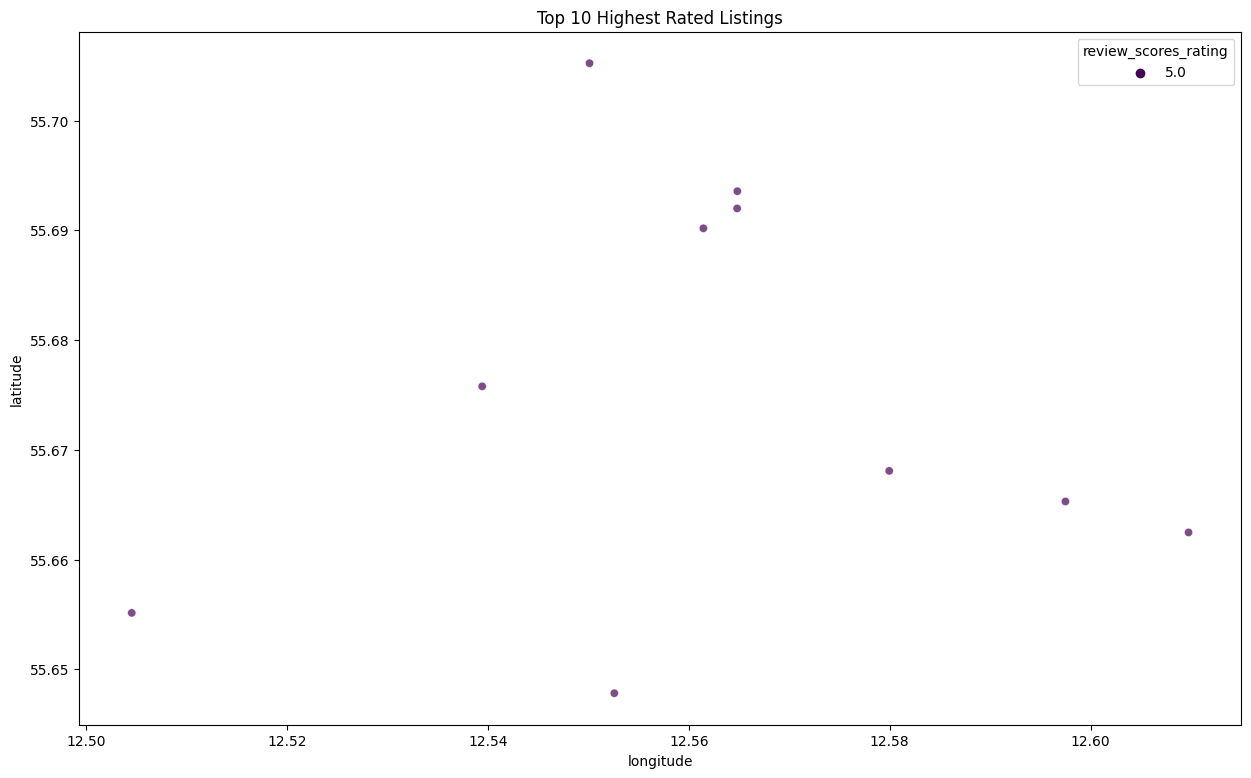

In [26]:
plt.figure(figsize=(15,9))
sns.scatterplot(data=top_highest_rated_listings, x='longitude', y='latitude', hue='review_scores_rating', palette='viridis', alpha=0.7)
plt.title("Top 10 Highest Rated Listings")


## 12. Now, use any preprocessing and feature engineering steps that you find relevant before proceeding (optional).

In [27]:
pd.get_dummies(data.loc[:,'room_type'])

,Entire home/apt,Hotel room,Private room,Shared room
0,True,False,False,False
1,True,False,False,False
2,True,False,False,False
3,True,False,False,False
4,True,False,False,False
...,...,...,...,...
13808,True,False,False,False
13809,True,False,False,False
13811,True,False,False,False
13812,True,False,False,False


In [28]:
# Dropping values that will not influence model such as ids
data.drop(['id', 'host_id'], axis=1, inplace=True) 

# One hot encoding of room_type feature
data[ pd.get_dummies(data.loc[:, 'room_type']).columns]  = pd.get_dummies(data.loc[:, 'room_type'])
data.drop('room_type', axis=1, inplace=True)
data['Entire home/apt'] = data['Entire home/apt'].astype(int) 
data['Hotel room'] = data['Hotel room'].astype(int)
data['Private room'] = data['Private room'].astype(int)
data['Shared room'] = data['Shared room'].astype(int)
data

,name,host_name,neighbourhood_cleansed,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,review_scores_rating,...,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365,price_category,Entire home/apt,Hotel room,Private room,Shared room
0,Copenhagen 'N Livin',Simon,Nørrebro,55.686410,12.547410,898.0,3,172,2022-06-21,4.78,...,4.73,4.71,1.08,1,0,1,1,0,0,0
1,Lovely house - most attractive area,Kari,Indre By,55.693070,12.576490,2600.0,4,59,2022-08-09,4.91,...,4.94,4.81,0.55,1,303,3,1,0,0,0
2,City Centre Townhouse Sleeps 1-10 persons,Julia,Indre By,55.676020,12.575400,3250.0,3,300,2022-09-10,4.53,...,4.89,4.59,2.06,3,56,4,1,0,0,0
3,Best Location in Cool Istedgade,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,725.0,7,24,2022-08-04,4.92,...,4.87,4.80,0.16,1,59,1,1,0,0,0
4,"Beautiful, spacious, central, renovated Penthouse",Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,1954.0,3,19,2022-08-22,4.88,...,4.80,4.53,0.13,1,0,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13808,Ny rummelig lejlighed med tilhørende kat.,Morten,Brønshøj-Husum,55.739028,12.487433,856.0,6,4,2022-08-28,4.75,...,4.50,5.00,1.85,1,0,1,1,0,0,0
13809,Big beautiful and charming apartment,Tanja,Bispebjerg,55.730481,12.521243,1050.0,2,4,2022-09-04,5.00,...,4.75,5.00,1.64,2,0,2,1,0,0,0
13811,Dejligt lille hus med flere hyggekroge ude og ...,Kathrine,Valby,55.667782,12.463285,450.0,3,3,2022-07-21,5.00,...,4.67,5.00,1.01,1,0,1,1,0,0,0
13812,Lejlighed i Storkøbenhavn. 13 minutter fra cen...,Tim,Valby,55.659536,12.474726,400.0,1,3,2022-08-14,5.00,...,4.67,5.00,1.27,1,0,1,1,0,0,0


In [29]:
data

,name,host_name,neighbourhood_cleansed,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,review_scores_rating,...,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365,price_category,Entire home/apt,Hotel room,Private room,Shared room
0,Copenhagen 'N Livin',Simon,Nørrebro,55.686410,12.547410,898.0,3,172,2022-06-21,4.78,...,4.73,4.71,1.08,1,0,1,1,0,0,0
1,Lovely house - most attractive area,Kari,Indre By,55.693070,12.576490,2600.0,4,59,2022-08-09,4.91,...,4.94,4.81,0.55,1,303,3,1,0,0,0
2,City Centre Townhouse Sleeps 1-10 persons,Julia,Indre By,55.676020,12.575400,3250.0,3,300,2022-09-10,4.53,...,4.89,4.59,2.06,3,56,4,1,0,0,0
3,Best Location in Cool Istedgade,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,725.0,7,24,2022-08-04,4.92,...,4.87,4.80,0.16,1,59,1,1,0,0,0
4,"Beautiful, spacious, central, renovated Penthouse",Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,1954.0,3,19,2022-08-22,4.88,...,4.80,4.53,0.13,1,0,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13808,Ny rummelig lejlighed med tilhørende kat.,Morten,Brønshøj-Husum,55.739028,12.487433,856.0,6,4,2022-08-28,4.75,...,4.50,5.00,1.85,1,0,1,1,0,0,0
13809,Big beautiful and charming apartment,Tanja,Bispebjerg,55.730481,12.521243,1050.0,2,4,2022-09-04,5.00,...,4.75,5.00,1.64,2,0,2,1,0,0,0
13811,Dejligt lille hus med flere hyggekroge ude og ...,Kathrine,Valby,55.667782,12.463285,450.0,3,3,2022-07-21,5.00,...,4.67,5.00,1.01,1,0,1,1,0,0,0
13812,Lejlighed i Storkøbenhavn. 13 minutter fra cen...,Tim,Valby,55.659536,12.474726,400.0,1,3,2022-08-14,5.00,...,4.67,5.00,1.27,1,0,1,1,0,0,0


<Axes: >

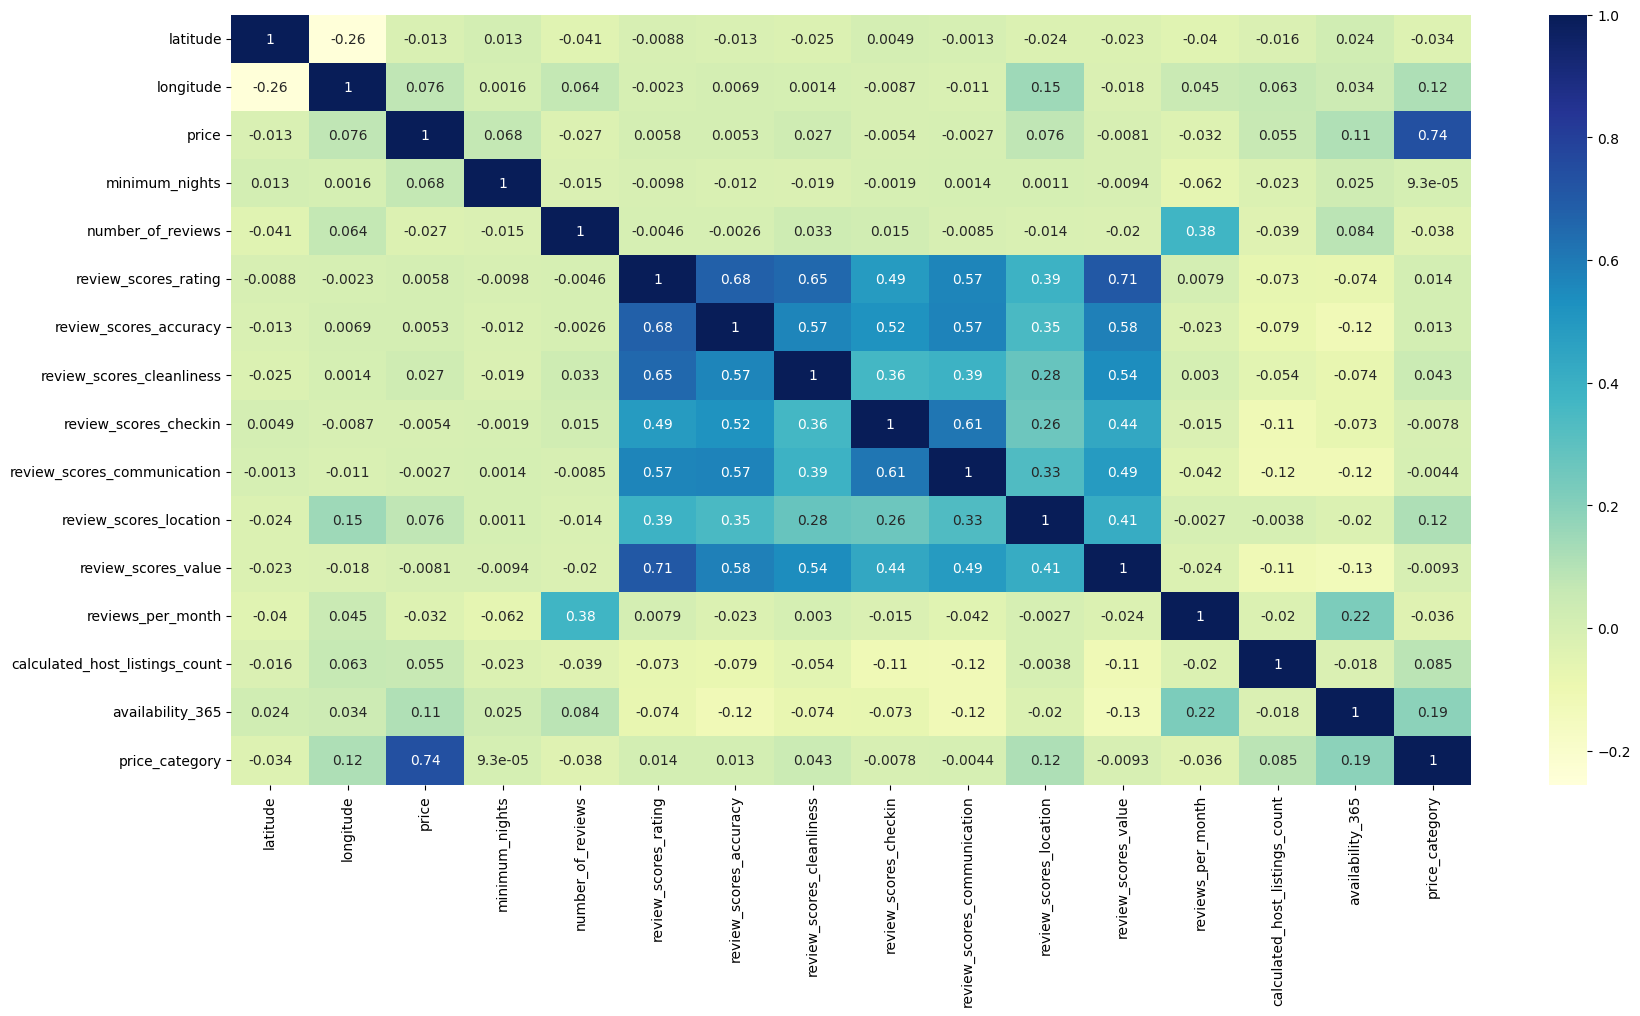

In [30]:
correlation_data = data.copy()
correlation_data.drop(['name', 'host_name', 'neighbourhood_cleansed', 'last_review', 'Entire home/apt', 'Hotel room', 'Private room', 'Shared room'], axis=1, inplace=True)
plt.figure(figsize=(20,10))
sns.heatmap(correlation_data.corr(), cmap='YlGnBu', annot=True)

In [31]:
# here we will remove the 'review_score_rating' because it is correlated with 'review_score_value'"1.
data.drop('review_scores_rating', axis=1, inplace=True)
data

,name,host_name,neighbourhood_cleansed,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,review_scores_accuracy,...,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365,price_category,Entire home/apt,Hotel room,Private room,Shared room
0,Copenhagen 'N Livin',Simon,Nørrebro,55.686410,12.547410,898.0,3,172,2022-06-21,4.79,...,4.73,4.71,1.08,1,0,1,1,0,0,0
1,Lovely house - most attractive area,Kari,Indre By,55.693070,12.576490,2600.0,4,59,2022-08-09,4.93,...,4.94,4.81,0.55,1,303,3,1,0,0,0
2,City Centre Townhouse Sleeps 1-10 persons,Julia,Indre By,55.676020,12.575400,3250.0,3,300,2022-09-10,4.63,...,4.89,4.59,2.06,3,56,4,1,0,0,0
3,Best Location in Cool Istedgade,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,725.0,7,24,2022-08-04,4.87,...,4.87,4.80,0.16,1,59,1,1,0,0,0
4,"Beautiful, spacious, central, renovated Penthouse",Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,1954.0,3,19,2022-08-22,4.82,...,4.80,4.53,0.13,1,0,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13808,Ny rummelig lejlighed med tilhørende kat.,Morten,Brønshøj-Husum,55.739028,12.487433,856.0,6,4,2022-08-28,4.75,...,4.50,5.00,1.85,1,0,1,1,0,0,0
13809,Big beautiful and charming apartment,Tanja,Bispebjerg,55.730481,12.521243,1050.0,2,4,2022-09-04,4.50,...,4.75,5.00,1.64,2,0,2,1,0,0,0
13811,Dejligt lille hus med flere hyggekroge ude og ...,Kathrine,Valby,55.667782,12.463285,450.0,3,3,2022-07-21,5.00,...,4.67,5.00,1.01,1,0,1,1,0,0,0
13812,Lejlighed i Storkøbenhavn. 13 minutter fra cen...,Tim,Valby,55.659536,12.474726,400.0,1,3,2022-08-14,5.00,...,4.67,5.00,1.27,1,0,1,1,0,0,0


In [32]:
# Notice we have a few rows with NaN reviews.
null_rows = data[data.isnull().any(axis=1)]
print(f'Null rows shape: {null_rows.shape}')
null_rows

Null rows shape: (44, 23)


,name,host_name,neighbourhood_cleansed,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,review_scores_accuracy,...,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365,price_category,Entire home/apt,Hotel room,Private room,Shared room
44,City Room,Nikolaj Egelund,Indre By,55.68187,12.56375,500.0,2,2,2020-01-21,NaN,...,NaN,NaN,0.05,1,0,1,0,0,1,0
447,Fully furnished room for rent,Msr,Brønshøj-Husum,55.71387,12.45995,400.0,30,1,2013-07-23,NaN,...,NaN,NaN,0.01,1,0,1,0,0,1,0
501,2 storeys in Cosy Townhouse,William,sterbro,55.71142,12.55690,3250.0,2,1,2013-11-01,NaN,...,NaN,NaN,0.01,1,0,4,1,0,0,0
537,Penthouselejlighed i Kbh C under Tour de France ?,Klaus,Indre By,55.68097,12.56252,1191.0,7,1,2017-12-09,NaN,...,NaN,NaN,0.02,1,0,2,1,0,0,0
878,Sweet Apartment in Copenhagen Dk,Angelina,Amager Vest,55.65982,12.60475,938.0,1,1,2016-09-07,NaN,...,NaN,NaN,0.01,6,0,1,0,0,1,0
976,***Best Choice for the best holiday***,Malene,Vesterbro-Kongens Enghave,55.66937,12.54309,750.0,1,4,2018-03-26,NaN,...,NaN,NaN,0.06,1,0,1,1,0,0,0
1003,A night in Copenhagen Denmark,Angelina,Amager Øst,55.66130,12.60490,983.0,1,1,2016-06-02,NaN,...,NaN,NaN,0.01,6,0,1,0,0,1,0
1101,værelse til leje for korter periode,Pia,Vesterbro-Kongens Enghave,55.67008,12.55616,450.0,1,1,2017-10-17,NaN,...,NaN,NaN,0.02,3,0,1,0,0,1,0
1159,Lille Lejlighed,Jacob,Indre By,55.67096,12.58919,400.0,1,1,2014-12-29,NaN,...,NaN,NaN,0.01,1,345,1,0,0,1,0
1258,Unique & cosy apartment.,Sebastien,Amager Vest,55.66001,12.60257,750.0,1,1,2016-06-07,NaN,...,NaN,NaN,0.01,1,0,1,1,0,0,0


In [33]:
# Since the number of rows are low compared to the whole data set, we can just drop them
data = data[data['review_scores_accuracy'].notnull()]
data = data[data['review_scores_location'].notnull()]
data

,name,host_name,neighbourhood_cleansed,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,review_scores_accuracy,...,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365,price_category,Entire home/apt,Hotel room,Private room,Shared room
0,Copenhagen 'N Livin',Simon,Nørrebro,55.686410,12.547410,898.0,3,172,2022-06-21,4.79,...,4.73,4.71,1.08,1,0,1,1,0,0,0
1,Lovely house - most attractive area,Kari,Indre By,55.693070,12.576490,2600.0,4,59,2022-08-09,4.93,...,4.94,4.81,0.55,1,303,3,1,0,0,0
2,City Centre Townhouse Sleeps 1-10 persons,Julia,Indre By,55.676020,12.575400,3250.0,3,300,2022-09-10,4.63,...,4.89,4.59,2.06,3,56,4,1,0,0,0
3,Best Location in Cool Istedgade,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,725.0,7,24,2022-08-04,4.87,...,4.87,4.80,0.16,1,59,1,1,0,0,0
4,"Beautiful, spacious, central, renovated Penthouse",Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,1954.0,3,19,2022-08-22,4.82,...,4.80,4.53,0.13,1,0,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13808,Ny rummelig lejlighed med tilhørende kat.,Morten,Brønshøj-Husum,55.739028,12.487433,856.0,6,4,2022-08-28,4.75,...,4.50,5.00,1.85,1,0,1,1,0,0,0
13809,Big beautiful and charming apartment,Tanja,Bispebjerg,55.730481,12.521243,1050.0,2,4,2022-09-04,4.50,...,4.75,5.00,1.64,2,0,2,1,0,0,0
13811,Dejligt lille hus med flere hyggekroge ude og ...,Kathrine,Valby,55.667782,12.463285,450.0,3,3,2022-07-21,5.00,...,4.67,5.00,1.01,1,0,1,1,0,0,0
13812,Lejlighed i Storkøbenhavn. 13 minutter fra cen...,Tim,Valby,55.659536,12.474726,400.0,1,3,2022-08-14,5.00,...,4.67,5.00,1.27,1,0,1,1,0,0,0


In [34]:
# Dropping text data since our model can't process it. We could do a bag of words representation, but 
# for now we assume the listing name, host name etc. does not have a impact on whether a listing is expensive or not.
data.drop(['name', 'host_name', 'neighbourhood_cleansed', 'last_review'], axis=1, inplace=True)

### 13. Create another new column, where the price is divided into two categories: "expensive" listings defined by all listings with a price higher than the median price, and "affordable" listings defined by all listings with a price equal to or below the median price. You can encode the affordable listings as "0" and the expensive ones as "1". All listings should now have a classification indicating either expensive listings (1) or affordable listings (0).

In [35]:
median_price = data['price'].median()
median_price

data['is_expensive'] = data['price'] > median_price
data['is_expensive'] = data['is_expensive'].astype(int)
data

,latitude,longitude,price,minimum_nights,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365,price_category,Entire home/apt,Hotel room,Private room,Shared room,is_expensive
0,55.686410,12.547410,898.0,3,172,4.79,4.78,4.86,4.89,4.73,4.71,1.08,1,0,1,1,0,0,0,0
1,55.693070,12.576490,2600.0,4,59,4.93,4.96,4.93,4.86,4.94,4.81,0.55,1,303,3,1,0,0,0,1
2,55.676020,12.575400,3250.0,3,300,4.63,4.44,4.78,4.70,4.89,4.59,2.06,3,56,4,1,0,0,0,1
3,55.670230,12.555040,725.0,7,24,4.87,4.73,5.00,5.00,4.87,4.80,0.16,1,59,1,1,0,0,0,0
4,55.666602,12.555283,1954.0,3,19,4.82,4.88,4.87,4.82,4.80,4.53,0.13,1,0,2,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13808,55.739028,12.487433,856.0,6,4,4.75,4.00,5.00,5.00,4.50,5.00,1.85,1,0,1,1,0,0,0,0
13809,55.730481,12.521243,1050.0,2,4,4.50,5.00,5.00,5.00,4.75,5.00,1.64,2,0,2,1,0,0,0,1
13811,55.667782,12.463285,450.0,3,3,5.00,5.00,5.00,5.00,4.67,5.00,1.01,1,0,1,1,0,0,0,0
13812,55.659536,12.474726,400.0,1,3,5.00,4.67,5.00,5.00,4.67,5.00,1.27,1,0,1,1,0,0,0,0


### 14. Based on self-chosen features, develop a Naïve Bayes and k-Nearest Neighbor model to determine whether a rental property should be classified as 0 or 1. Remember to divide your data into training data and test data. Comment on your findings.

In [36]:
X = data.drop('is_expensive', axis=1, inplace=False)
y = data['is_expensive'].copy()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2)


In [37]:
X_train.shape

(9700, 19)

In [38]:
# We use k-fold cross-validation for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

parameters = {'n_neighbors': range(5,15), 'metric': ['euclidean', 'manhattan']}
model = GridSearchCV(KNeighborsClassifier(), parameters, cv=5, return_train_score=True)

model.fit(X_train.values, y_train.values)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': range(5, 15)},
             return_train_score=True)

In [43]:
from sklearn.metrics import precision_score, recall_score

train_predictions = model.predict(X_train.values)
test_predicitons = model.predict(X_test.values)

print(f'Parameters: {model.best_params_}')
print(f'Training Mean Accuracy : {model.score(X_train.values, y_train.values)}')
print(f'Test Mean Accuracy: {model.score(X_test.values, y_test.values)}')
print(f'Training Precision: {precision_score(y_train.values, train_predictions)}')
print(f'Test Precision: {precision_score(y_test.values, test_predicitons)}')
print(f'Training Recall: {recall_score(y_train, train_predictions)}')
print(f'Test Recall: {recall_score(y_test, test_predicitons)}')

Parameters: {'metric': 'manhattan', 'n_neighbors': 12}
Training Mean Accuracy : 0.9983505154639175
Test Mean Accuracy: 0.9975267930750206
Training Precision: 0.9979381443298969
Test Precision: 0.9975247524752475
Training Recall: 0.9987618654560462
Test Recall: 0.9975247524752475


In [44]:
model2 = GaussianNB()
model2.fit(X_train.values, y_train.values)
train_predictions = model2.predict(X_train.values)
test_predicitons = model2.predict(X_test.values)


print(f'Training Mean Accuracy : {model2.score(X_train.values, y_train.values)}')
print(f'Test Mean Accuracy: {model2.score(X_test.values, y_test.values)}')
print(f'Training Precision: {precision_score(y_train.values, train_predictions)}')
print(f'Test Precision: {precision_score(y_test.values, test_predicitons)}')
print(f'Training Recall: {recall_score(y_train, train_predictions)}')
print(f'Test Recall: {recall_score(y_test, test_predicitons)}')

Training Mean Accuracy : 0.9778350515463917
Test Mean Accuracy: 0.9806265457543281
Training Precision: 0.9925547755796639
Test Precision: 0.9957446808510638
Training Recall: 0.9628559636813867
Test Recall: 0.9653465346534653


## 15 Try to come up with a final conclusion to the Airbnb-Copenhagen assignment.

In conclusion:
* From the result we can see that kNN performs better than Naive Bayes.
* The kNN performs best when using 12 neighbors and Manhattan distance.
* We have not perfomed any processing for the outliers.
* We have not done any tranceformtion such as log(n) or sqrt(n).
* Eventhough we didn't do much processing, our model still performs well in term of Accurecay, pPercision and Recall acroos both the training set and test set.